In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='ignore')
from datetime import datetime
from datetime import timedelta
import scipy.stats as st
import math as mth
plt.rcParams['figure.figsize'] = [7,3]
pd.set_option('display.max_colwidth', None)
import plotly.express as px
import plotly.graph_objects as go
import re
import scipy.stats as stats
import numpy as np
from statsmodels. stats.weightstats import ztest as ztest

# Общая информация.

На анализ предоставлены данные по потреблению продуктов одного из лучших банков страны «Метанпромбанк».

Анализ должен показать, как клиенты пользуются услугами банка, а так же помочь составить портрет клиентов, которые склонны уходить из банка.

«Метанпромбанк» — деньги не пахнут!




**Целью анализа** является сегментация пользователей банковских продуктов по потреблению для понимания поведения клиентов, интересных особенностей,выявления точек роста и признаков, сигнализирующих о скором уходе клиента.




**Задачи:** 
- проведение исследовательского анализа данных,
- сегментация пользователей на основе данных о количестве потребляемых продуктов,
- формулировка и проверка статистических гипотез.



**ПЛАН.**

1.Загрузка данныч и изучение общей информации.   
Сколько пользователей представлено? Что можно сказать о каждом столбце? Значения какого типа они хранят?    
Приведение названий и типов столбцов к удобно обрабатываемому виду.

2.Обработка пропусков и дубликатов.  
Есть ли дубликаты в данных? Пропуски: встречаются ли они, в каких столбцах? Можно ли их обработать или оставить как есть?

3.Исследовательский анализ данных. 

Какие категории пользователей представлены в данных? Количество пользователей по категориям: город проживания, пол, возраст, наличие кредитной карты, уровны ЗП и т.д. Построение визуализации для распределении пользователей  по категориям.

Попробовать выделить классы  в стоблцах score,age, EST_SALARY,balance

Какие категории пользователей имеют выше баллы кредитного скоринга.
Как соотносятся категории пользователй с количеством продуктов, котрыми пользуется клиент и наличием кредитной карты.
Как соотносится активность клиента и его уход с разными характеристиками клиента(пол, возраст и т.д.)
везде используем визуализации.


4.Проверка статистических гипотез.  
Проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Проверка гипотезы, что клиенты с высоким балансом (или мбожно рассмотреть еще ЗП) более стабильны и менее склоны к оттоку. 


5.Сегментация на основе стратегических показателей. 
Составить портрет клиентов на основании проведенного анализа. 

6.Оток потребителей: признаки, предпосылки, стратегические показатели. 
Сделать вывод на основани аназиза.

7.Рекомендации.

8.Презентация:
- общая информация
- категории пльзователей по полу, возрасту, городу и т.п. 
- соотношение баллов кредитного скоринга, кол-ва продуктов, которые имеет клиентов, наличие кредит.карты, активности и ухода с категориями пользователей
- сегментация подльзователей
- оток потребителей: признаки, предпосылки, стратегические показатели
- рекомендации

## **Описание данных:**

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `USERID` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `city` — город,
- `gender` — пол,
- `age` — возраст,
- `equity` — приблизительная оценка собственности клиентов,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `credit_card` — есть ли кредитная карта,
- `last_activity` — активный клиент,
- `EST_SALARY` — заработная плата клиента,
- `churn` — ушёл или нет.

In [2]:
# чтение файла bank_scrooge.csv с данными и сохранение его в переменную 
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

In [3]:
df.head()

USERID  score       city gender   age  equity     balance  products  \
0  183012  850.0    Рыбинск      Ж  25.0       1    59214.82         2   
1  146556  861.0    Рыбинск      Ж  37.0       5   850594.33         3   
2  120722  892.0    Рыбинск      Ж  30.0       0         NaN         1   
3  225363  866.0  Ярославль      Ж  51.0       5  1524746.26         2   
4  157978  730.0  Ярославль      М  34.0       5      174.00         1   

   credit_card  last_activity  EST_SALARY  churn  
0            0              1    75719.14      1  
1            1              0    86621.77      0  
2            1              1   107683.34      0  
3            0              1   174423.53      1  
4            1              0    67353.16      1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


Датасет содержит 12 столбцов согласно описанию данных и 1000 строк.  
В столбцах age и balance наблюдаем пропуски.   
В названиях столбцов применяется верхний и нижний регистр.  
Cтолбцы credit_card, last_activity, churn не соотвествуют типу bool.

In [5]:
#приведение столбцов credit_card, last_activity, churn к типу bool
df ['credit_card'] = df ['credit_card'].astype('bool')
df['last_activity'] = df['last_activity'].astype('bool')
df ['churn'] = df ['churn'].astype('bool')

In [6]:
#приведение столбцов единому регистру и замена пробела на нижнее подчеркивание
df.columns = [x.lower() for x in df.columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  bool   
 9   last_activity  10000 non-null  bool   
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  bool   
dtypes: bool(3), float64(4), int64(3), object(2)
memory usage: 732.5+ KB


# Предобработка данных. 

## Пропуски.

In [8]:
#кол-во пропущенных значений 
df.isna().sum()

userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

In [9]:
#процент пропущенных значений
df.isna().mean()*100

userid            0.00
score             0.00
city              0.00
gender            0.00
age               0.26
equity            0.00
balance          22.95
products          0.00
credit_card       0.00
last_activity     0.00
est_salary        0.00
churn             0.00
dtype: float64

Пропуски в столбцах age и balance.
Пропуски в age удалим, т.к. их процент ничтожно мал и не повлияет на разультаты исследования.  

In [10]:
df = df[df['age'].isnull()==False]
df.isna().sum()

userid              0
score               0
city                0
gender              0
age                 0
equity              0
balance          2279
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

Изучим пропуски в balance, подумаем чем они могут вызваны. 

In [11]:
df_balance_nan = df[df['balance'].isnull() ==True]
df_balance_nan.head()

userid  score       city gender   age  equity  balance  products  \
2   120722  892.0    Рыбинск      Ж  30.0       0      NaN         1   
9   133130  906.0  Ярославль      Ж  67.0       0      NaN         1   
10  148929  927.0     Ростов      М  52.0       0      NaN         1   
11  172184  921.0     Ростов      М  41.0       0      NaN         1   
19  127034  922.0    Рыбинск      Ж  53.0       0      NaN         1   

    credit_card  last_activity  est_salary  churn  
2          True           True   107683.34  False  
9         False           True   238055.53  False  
10         True           True   196820.07  False  
11         True           True   217469.48  False  
19        False          False   147094.82  False

Распределение balance=NaN

In [12]:
columns = df_balance_nan[['city', 'gender','equity', 'products', 'credit_card', 'last_activity', 'churn']]

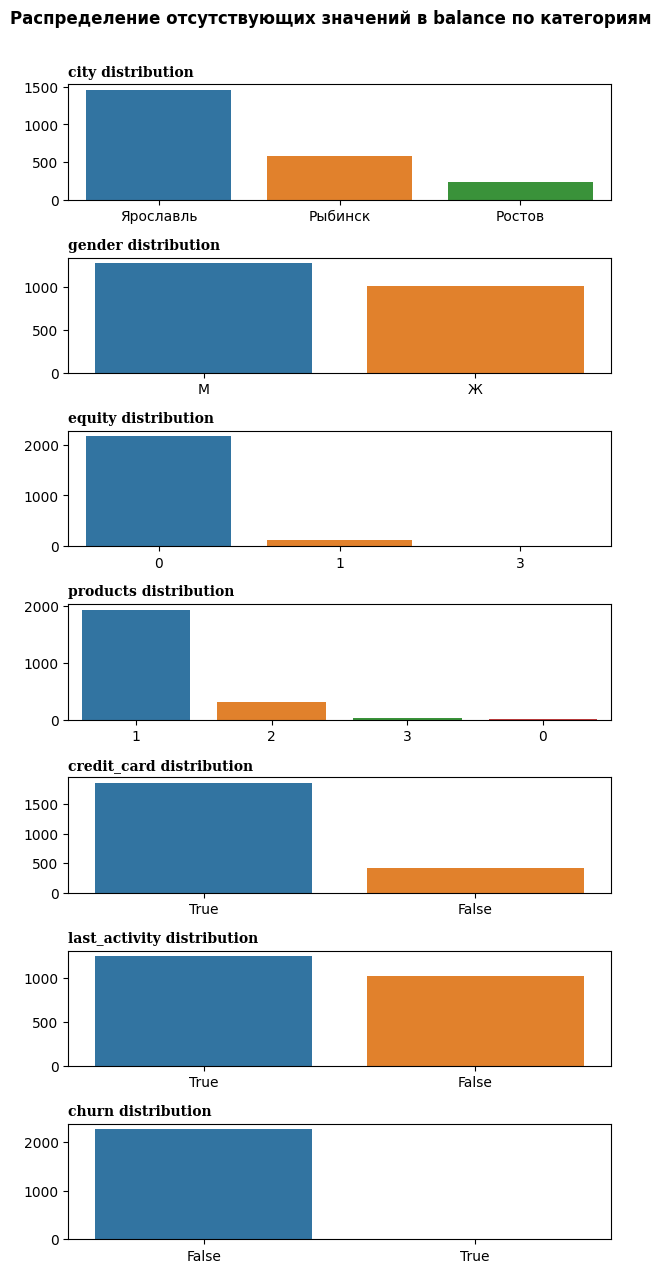

In [13]:
fig, ax = plt.subplots(7, 1, figsize=(7, 15))
fig.suptitle('Распределение отсутствующих значений в balance по категориям' , label= 'right', y=0.93, fontweight='bold')
#fig.tight_layout (h_pad=5)
plt.subplots_adjust(wspace=0.5, hspace=0.5) 

for num, col in enumerate(columns):
    sns.countplot(x=col, data=df_balance_nan, ax = ax[num], order = df_balance_nan[col].value_counts().index)
    ax[num].set(xlabel=None, ylabel=None),
    ax[num].set_title(f'{col} distribution', fontdict= {   #зададим размер, шрифт и положение заголовков         
        'fontsize': 10, 'fontweight':'bold'
        ,'fontfamily':'serif' 
    }, loc = 'left')

Итак, мы видим, что пропуски в столбце balance преимущественно среди клиентов из г. Ярославль, это мужчины, у которых оценка собсвенности равна 0,пользуются 1 продуктом банка, имеют кредитную карту, активны в своем поведении и  вообще не уходят. Могу предположить, что скорее это неблагополучные слои населения, которые активно пользуются кредитными предложениями банков. Возможно в банке есть кредитное предложение  и в балансе пропуски возникают при заполнениие информации при повторном обращении за кредитом в банк.

In [14]:
df_without_balance_nan = df.loc[:,df.columns!='balance']
df_without_balance_nan.duplicated().sum()


0

Предположение о незаполнении не подтвердилось. Природу пропусков определить однозначно сложно. Посмотрим какие значени я в столбце balance с помощью гистограммы.

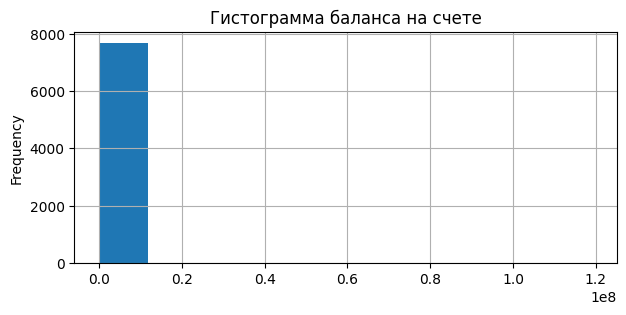

In [15]:
df['balance'].plot (kind='hist', title='Гистограмма баланса на счете', grid=True);

Как видим только положительные значения входят в balance, значит баланс по кредитному счету не отражается в столбце, а только дебетовые счета в нем. Еще могу предположить, что у банка было или есть спецпредложение по кредитам, где получение ведется по упрощенной форме и заполнение balance не требуется. Повторюсь, природу пропусков определить однозначно невозможно. Пропуски оставляем как есть. 

## Обработка дубликатов.

In [16]:
#проверка на явные дубликаты 
df.duplicated().sum()

0

Явных дубликатов нет. Неявные дубликаты обычно встречаются в названиях, проверим города.

In [17]:
df['city'].value_counts()

Ярославль    5875
Рыбинск      2683
Ростов       1416
Name: city, dtype: int64

Проверим уникальность userid, это важно, по определению не должно быть дубликатов.

In [18]:
df['userid'].duplicated().sum()

50

Выявлено 50 дубликатов, выведем эти строки вместе м оригиналами, подумаем чем они могут быть вызваны.

In [19]:
df_dupl_userid = df[df['userid'].duplicated(keep=False)].rename_axis('index').sort_values(by=['userid','index'])
df_dupl_userid.head()

userid  score       city gender   age  equity     balance  products  \
index                                                                        
1893   116540  883.0    Рыбинск      Ж  55.0       1   362756.49         3   
7694   116540  887.0  Ярославль      Ж  38.0       0         NaN         1   
4866   117943  855.0    Рыбинск      Ж  32.0       6  1036832.93         4   
7542   117943  880.0  Ярославль      Ж  40.0       0         NaN         1   
5863   120258  908.0    Рыбинск      Ж  38.0       4  2213581.63         2   

       credit_card  last_activity  est_salary  churn  
index                                                 
1893         False           True   175920.48   True  
7694         False           True   119247.61  False  
4866          True           True   107792.71   True  
7542          True          False   137718.93  False  
5863         False           True   160327.77   True

Как видим дублирующие записи возникают в другом городе. Возможно регистрация не проходит в общей базе, в каждом городе она своя, как следствие- дубликаты при объдинении баз разных городов. Систему регистрации, разнесенной по разным городам, считаю некорректной, наглядно продемонстрировано, что такая регистрация может приводить к некорректному восприятию данных.Т.к. userid- по определению уникальный индентификатор, в своей работе дубликаты удалю. 

In [20]:
df = df.drop_duplicates(subset='userid')

В датасете нет явных дубликатов. Выявлены неявленные дубликаты в userid, дублируются id из разных городов, данные дубликаты удалены. 

## Выбросы.
Построим боксплоты для столбцов с диапазаноми значений, это score, age, balance(уже строили), est_salary, укажаем для инофрмации на графике min и max.

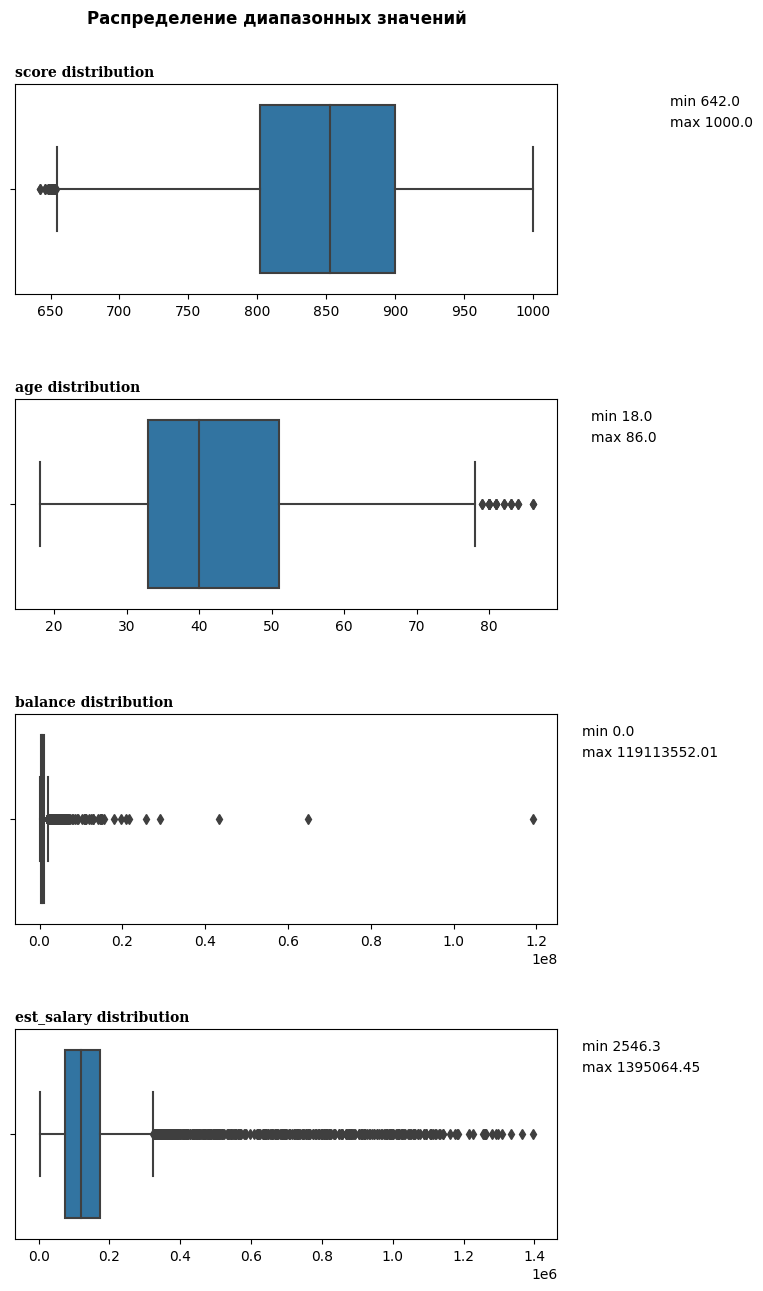

In [21]:
columns = df[['score', 'age', 'balance', 'est_salary']]
fig, ax = plt.subplots(4, 1, figsize=(7, 15))
fig.suptitle('Распределение диапазонных значений' , label= 'right', y=0.93, fontweight='bold')
#fig.tight_layout (h_pad=5)
plt.subplots_adjust(wspace=0.5, hspace=0.5) 

for num, col in enumerate(columns):
    sns.boxplot(x=col, data=df, ax = ax[num], order = df[col].value_counts().index)
#     plt.text(100, -0.4, f"min {df[col].min()}", fontsize=10)
#     plt.text(100, -0.3, f"max {df[col].max()}", fontsize=10)
    ax[num].set(xlabel=None, ylabel=None),
    ax[num].set_title(f'{col} distribution', fontdict= {   #зададим размер, шрифт и положение заголовков         
        'fontsize': 10, 'fontweight':'bold'
        ,'fontfamily':'serif' 
    }, loc = 'left')
    ax[num].text(int(df[col].max()*1.1), -0.4, f"min {df[col].min()}", fontsize=10) 
    ax[num].text(int(df[col].max()*1.1), -0.3, f"max {df[col].max()}", fontsize=10)
    #plt.text(100, -0.3, f"max {df[col].max()}", fontsize=10)

Из графиков видим, что:
1. Баллы кредитного скоринга score имеют диапазаон от от 642 до 1000, причем основная часть значаний начинается с 660 баллов, т.е 642-660 скорее выбросы.
2. Возраст распределен от 18 до 86 лет, выбросы - клиенты старше 78 лет.
3. Баланс распределен от 0 до 1,2х10^8. Основная часть значений сконцентрирована в околонулевом значении, ограничим график по оси Х, чтобы подробнее рассмотреть распределение.
4. Зарплата варьиеруется от 2546,3 до 1,4х10^6. Выбросы начинаются с 0,3х10^6. Также не помешает посмотреть сам ящик поближе.

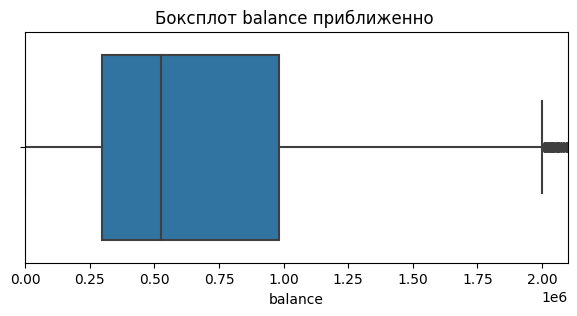

In [22]:
sns.boxplot(x='balance', data=df)
plt.title('Боксплот balance приближенно ')
plt.xlim (0, 2100000);

Боксплот показывает нам границы основных значений balance в 0-2000000 единиц. 

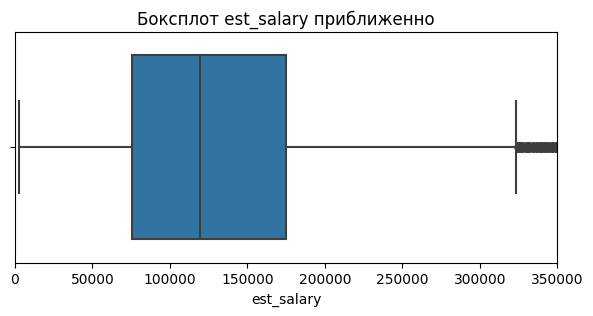

In [23]:
sns.boxplot(x='est_salary', data=df)
plt.title('Боксплот est_salary приближенно')
plt.xlim (0, 350000);

Значения в столбцах score, age, balance, est_salary,которые можно характеризовать как диапазонные, изучены на выбросы. Выбросы наблюдались в каждом столбце.   

В своей работе не считаю нужным удалять выбросы, т.к. это удалит значительную часть данных и приведет к искажению результатов.

# Анализ данных.
## Категории пользователей, представленных в данных.  
Представим распределение пользователей по городу проживания, полу, наличию кредитной карты, активности, и уходу в виде графиков.

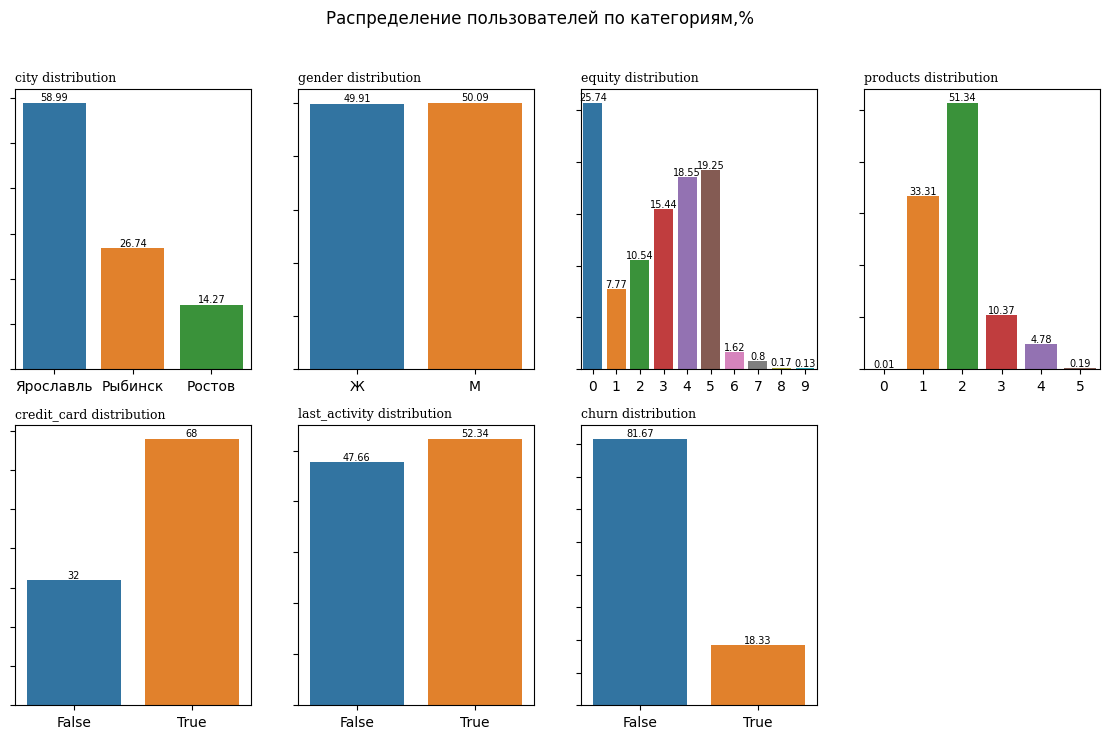

In [24]:
#функция для графиков распределения по характеристикам 

columns = df[['city', 'gender', 'equity', 'products','credit_card', 'last_activity', 'churn']]

fig, ax = plt.subplots(2, 4, figsize=(14, 8))

fig.suptitle('Распределение пользователей по категориям,%', label= 'right', y=0.98)
plt.subplots_adjust(wspace=0.2, hspace=0.2) 
ax = ax.flatten()

for num, col in enumerate(columns):
    #датасет с группировкой по исследуемому признаку 
    df_fig_col = df.groupby(col)['userid'].count().reset_index()
    #подсчет процентов в разрезе характеристик
    df_fig_col ['%']= round( df_fig_col['userid'] / df_fig_col['userid'].sum() *100 ,2)
    
#     if col=='products':
#         sns.barplot(y=df_fig_col ['%'], x='products', data=df_fig_col, ax = ax[1:3,1], order = df_fig_col[col].value_counts().index)
#     else:                
    sns.barplot(y=df_fig_col ['%'], x=col, data=df_fig_col, ax = ax[num], order = df_fig_col[col].value_counts().index)
    ax[num].set_yticklabels(ax[num].get_yticklabels(),fontsize=7)
    #ax[num].set_xticklabels(ax[num].get_xticklabels(), fontsize=7)
    ax[num].set(xlabel=None, ylabel=None)
    ax[num].set_title(f'{col} distribution',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'left')
    
    for container in ax[num].containers:
        ax[num].bar_label(container=container, fontsize=7)

ax[7].remove()

Итак,   
больше половины пользователей и г. Рыбинск - 59%,  
распределение м/ж близко к 50/50,   
63% пользователей имеют оценку собственности 0,5 или 4,    
больше половины пользователей имеют 2 продукта,
68% пользователей имеют кредитную карту,  
почти поливина пользователей неактивны -47,7%, высокий показатель(означает ли неактивность склонность к уходу?)  
процент ухода пользователей 18,3%.    

Странно, что есть пользователи с числом продуктов 0, непонятно почему пользователь в базе, раз он не имеет банковских продуктов, то и клиентом считаться не может. Удалим данного пользователя как ошибочного.

In [25]:
#посмотрим кто это
df[df['products']==0]

userid  score     city gender   age  equity  balance  products  \
8957  147837  962.0  Рыбинск      Ж  79.0       3      NaN         0   

      credit_card  last_activity  est_salary  churn  
8957        False          False    25063.96   True

In [26]:
df= df[df['products']!=0]

Также очень мало клиентов с пятью продуктами- 0,2%. Ввиду крайней малочисленности данной группы рассматривать ее в своем анализе я не буду, это не целевая аудитория.  Удаляем.

In [27]:
df= df[df['products']!=5]

## Классы в стоблцах score,age, EST_SALARY,balance

''

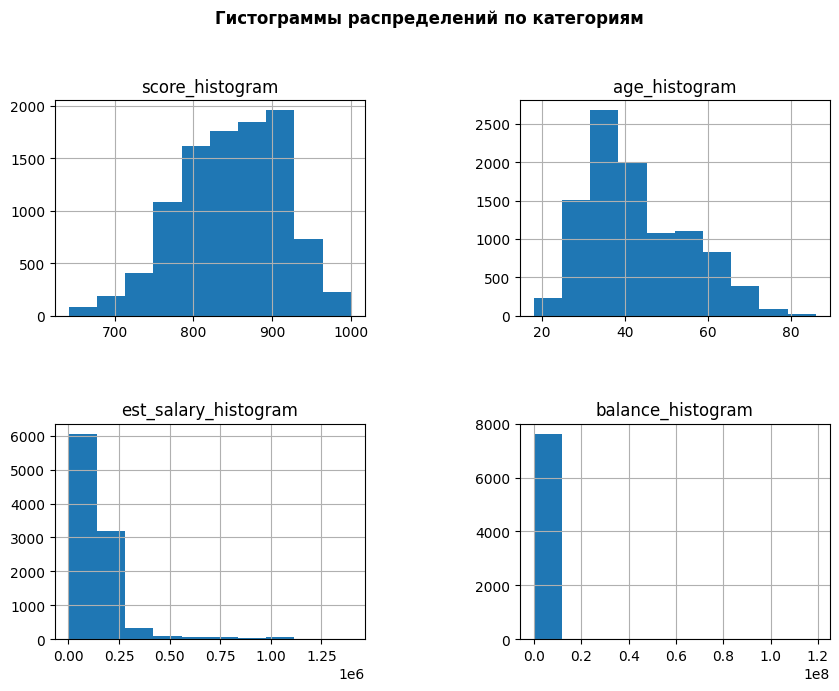

In [28]:
columns = df[['score','age', 'est_salary','balance']]
fig, ax = plt.subplots(2, 2, figsize=(10, 7))
fig.suptitle('Гистограммы распределений по категориям' , label= 'right', y=1.01, fontweight='bold')
plt.subplots_adjust(wspace=0.5, hspace=0.5) 
ax = ax.flatten()
for num, col in enumerate(columns):
    df[col].plot (kind='hist', title=f'{col}_histogram', grid=True, ax = ax[num])
    ax[num].set(xlabel=None, ylabel=None)
;

### Кредитный скоринг (Score)

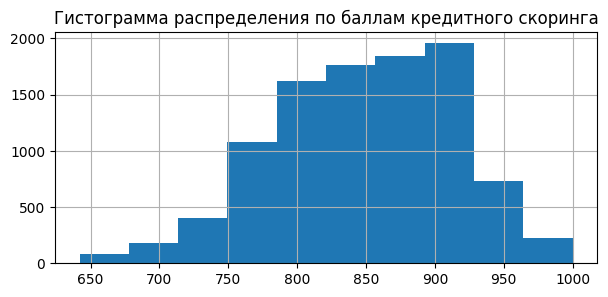

In [29]:
df['score'].plot (kind='hist', title='Гистограмма распределения по баллам кредитного скоринга', grid=True)
plt.ylabel('');

Больше всего клиентов находятся в диапазоне 750-930, скорее всего это и есть баллы, достаточные для получения кредита на стандартных условиях. Если баллы ниже 750, то ниже и вероятность получения кредита. Выше 930, скорее всего с таким балло реже обращаются за кредитом или получают кредиты на более выгодных условиях. 

Посмотри как распределены пользователи исходя из этой шкалы. Для этого введем дополнительный столбец с указание оценки score: низкий, хороший, отличный.

In [30]:
def score_group(x):
    if x <750:
        return 'низкий'
    if 750<=x <930:
        return 'хороший'
    if x>=930:
        return 'отличный'

In [31]:
df['score_group']=df['score'].apply(score_group)

In [32]:
df_score_group_pie = df.groupby('score_group')['userid'].count()
df_score_group_pie

score_group
низкий       671
отличный     924
хороший     8309
Name: userid, dtype: int64

Построим круговую диагграму для наглядности распределения в процентах

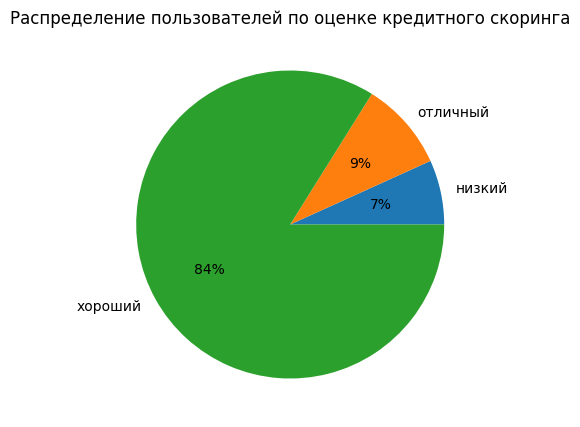

In [33]:
df_score_group_pie.plot(kind = 'pie', y = 'userid', autopct='%1.0f%%', figsize=(5, 5))
plt.title('Распределение пользователей по оценке кредитного скоринга')
plt.ylabel('');

Как видимная основная часть клиентов имеют оенку кредитного скоринга - хороший. Т.е. 84% клиентов получают продукты банка на стандартных условиях. 7% смогли получить кредиты даже при низклй оценке. Среди получивших кредиты 9% с высокой оценкой, возможно понадобились допсредства на очень крупную покупку, либо банк сделала выгодное предложение. 

### Возраст.

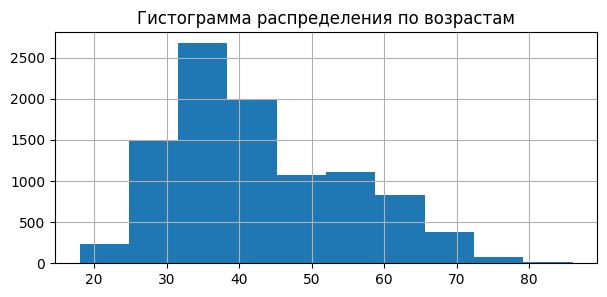

In [34]:
df['age'].plot (kind='hist', title='Гистограмма распределения по возрастам', grid=True)
plt.ylabel('');

Как видим, большая часть клиентов это люди в возрасте 32-38-45 лет. 
Введем следующую классификацию по возрасту:  
до 32 - молодежь  
32-45 - трудоспособное население  
45- 58 - предпенсионный возраст  
больше 65 лет - пенсионеры   
Закодируем возраст согласно классификации.

In [35]:
def age_group(x):
    if x <32:
        return 'молодежь'
    if 32<=x <45:
        return 'трудоспособный'
    if 45<=x <58:
        return 'предпенсионный'
    if x>=58:
        return 'пенсионер'

In [36]:
df['age_group'] = df['age'].apply(age_group)

Сгруппируем данные и построй piechart.

In [37]:
df_age_group_pie = df.groupby('age_group')['userid'].count()
df_age_group_pie

age_group
молодежь          1735
пенсионер         1490
предпенсионный    2222
трудоспособный    4457
Name: userid, dtype: int64

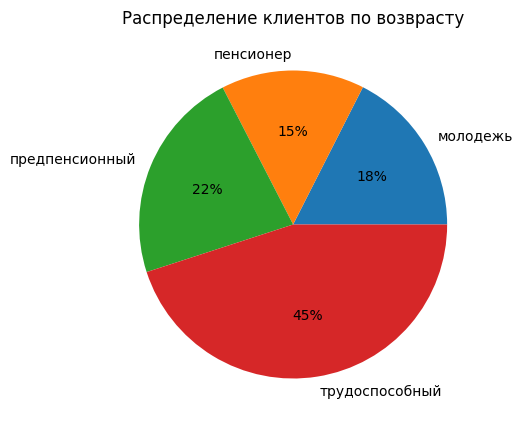

In [38]:
df_age_group_pie.plot(kind = 'pie', y = 'userid', autopct='%1.0f%%', figsize=(5, 5))
plt.title('Распределение клиентов по возврасту')
plt.xlabel('')
plt.ylabel('');

Молодых клиентов больше, чем пожилых.

### Зарплата (est_salary).

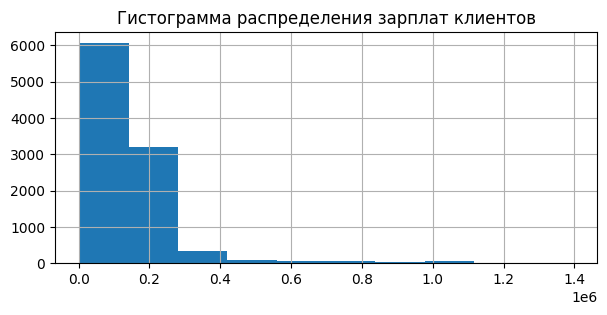

In [39]:
df['est_salary'].plot (kind='hist', title='Гистограмма распределения зарплат клиентов', grid=True)
plt.ylabel('');

Гистограмма скошена вправо, имеет длинный хвост.Больше всего клиентов с зп до 100 тыс, потом  иде большая группа с зп до 250 тыс. Посмотри гистограмму поближе.

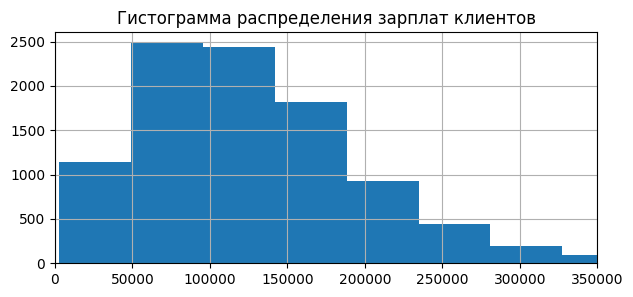

In [40]:
df['est_salary'].plot (kind='hist', bins = 30, title='Гистограмма распределения зарплат клиентов', grid=True)
plt.ylabel('')
plt.xlim (0, 350000);

Здесь можно выделить группу с зп до 50 тыс - низкий доход, 50-140 тыс - средний доход, 140-270 - выше среднего, больше 270 тыс.- высокий

In [41]:
def salary_group(x):
    if x <50000:
        return 'ниже среднего'
    if 50000<=x <140000:
        return 'средний'
    if 140000<=x <270000:
        return 'выше среднего'
    if x>=270000:
        return 'высокий'

In [42]:
df['profit'] = df['est_salary'].apply(salary_group)

In [43]:
df_profit_group_pie = df.groupby('profit')['userid'].count()
df_profit_group_pie

profit
высокий           719
выше среднего    3212
ниже среднего    1190
средний          4783
Name: userid, dtype: int64

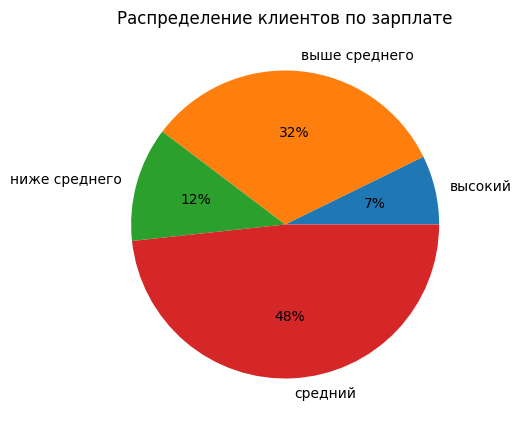

In [44]:
df_profit_group_pie.plot(kind = 'pie', y = 'userid', autopct='%1.0f%%', figsize=(5, 5))
plt.title('Распределение клиентов по зарплате')
plt.xlabel('')
plt.ylabel('');

80% имеют средний и околосредний доход.

### Balance

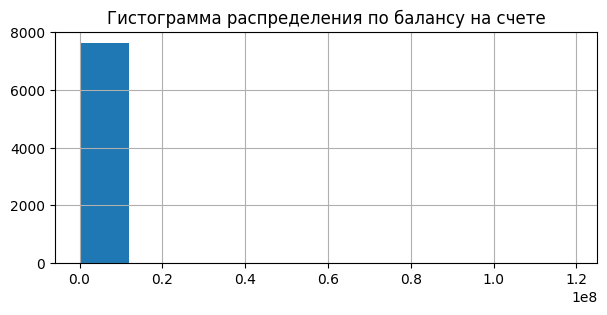

In [45]:
df['balance'].plot (kind='hist', title='Гистограмма распределения по балансу на счете', grid=True)
plt.ylabel('');

Гистограмма смещена вправо и имеет длинюююющий хвост до 1,2х10^8. Основные значения на данном графике до 0,1х10^8. Ограничим ось х и изучим околонулевые значения. 

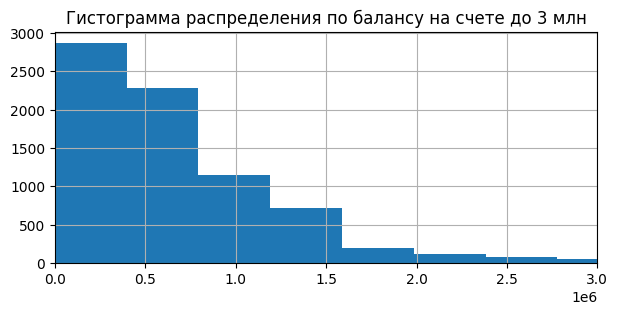

In [46]:
df['balance'].plot (kind='hist', bins = 300, title='Гистограмма распределения по балансу на счете до 3 млн', grid=True)
plt.ylabel('')
plt.xlim (0, 3000000);

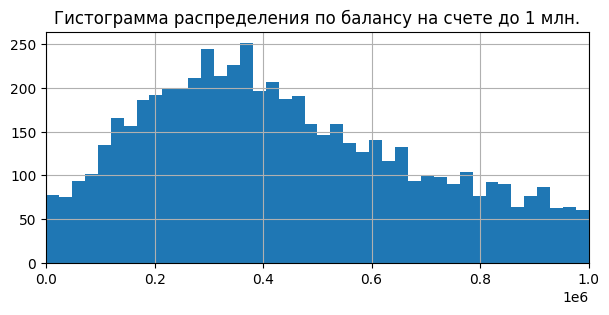

In [47]:
df['balance'].plot (kind='hist', bins = 5000, title='Гистограмма распределения по балансу на счете до 1 млн.', grid=True)
plt.ylabel('')
plt.xlim (0, 1000000);

Чаще всего у клиента на балансе сумма от 100 до 600 тыс. Сгруппируем значения баланса.

In [48]:
def balance_group(x):
    if x <10000:
        return '< 100 тыс.'
    if 100000<=x <600000:
        return '100-600 тыс.'
    if x>=600000:
        return '> 600 тыс.'

In [49]:
df['balance_group'] = df['balance'].apply(balance_group)
#df

In [50]:
df_balance_group_pie = df.groupby('balance_group')['userid'].count()
df_balance_group_pie

balance_group
100-600 тыс.    3888
< 100 тыс.        53
> 600 тыс.      3376
Name: userid, dtype: int64

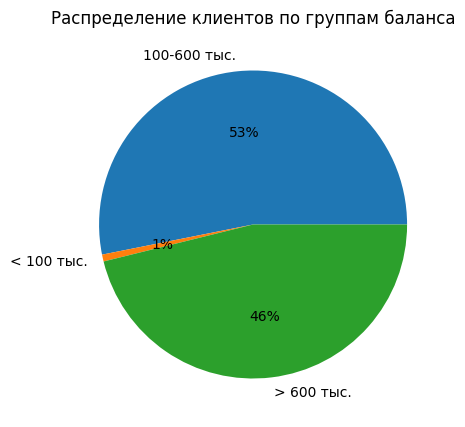

In [51]:
df_balance_group_pie.plot(kind = 'pie', y = 'userid', autopct='%1.0f%%', figsize=(5, 5))
plt.title('Распределение клиентов по группам баланса')
plt.xlabel('')
plt.ylabel('');

Клентов банка трудно назвать бедными,наряду с тем что доход ниже среднего только у 12%, так и  доля клиентов с меньше 100 тыс на счету 1%.

## Какие категории пользователей имеют выше баллы кредитного скоринга. Как соотносятся категории пользователй с количеством продуктов, котрыми пользуется клиент и наличием кредитной карты. Как соотносится активность клиента и его уход с разными характеристиками клиента(пол, возраст и т.д.) везде используем визуализации.

Для начала проверим коррелируют между собой числовые данные с помощью pairplot

In [52]:
#sns.pairplot(df[['score','equity', 'products', 'age', 'balance']]);

Явных взаимосвязей не наблюдаем. 

In [53]:
#выведем столбцы, для которых будет анализ, equity будем рисовать отдельно для читаемости 
columns= df[['city', 'gender', 'age_group', 'profit', 'credit_card', 'score_group',\
             'products','last_activity', 'churn', 'balance_group']]

### Соотношение категорий пользователей и количеством продуктов, которыми пользуется клиент.

In [54]:
#выведем столбцы, для которых будет анализ, equity будем рисовать отдельно для читаемости 
columns= df[['city', 'gender', 'age_group', 'profit', 'credit_card', 'score_group','last_activity', 'churn', 'balance_group','equity']]

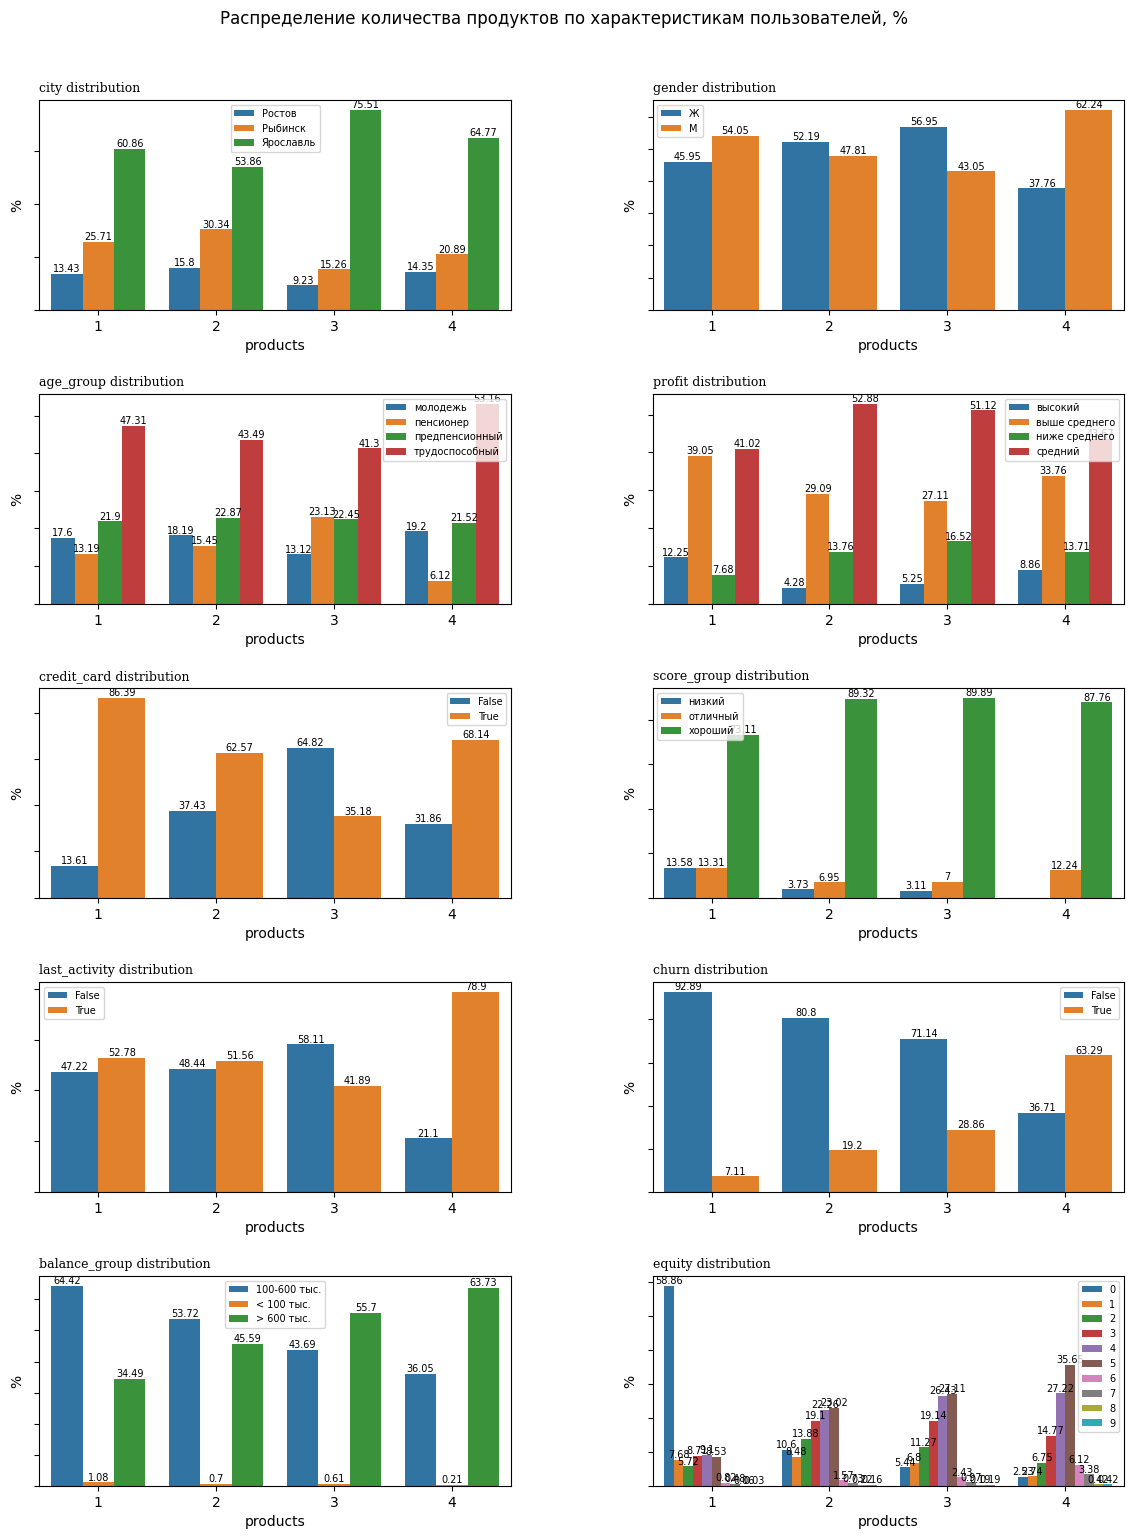

In [55]:
#график
fig, ax = plt.subplots(5, 2, figsize=(14, 18))
fig.suptitle('Распределение количества продуктов по характеристикам пользователей, %' , label= 'right', y=0.93)
plt.subplots_adjust(wspace=0.3, hspace=0.4) 
ax = ax.flatten()

for num, col in enumerate(columns):
    df_fig = df.groupby(['products', col])['userid'].count().reset_index()
    df_fig_prod = df_fig[df_fig['products']==1]
    df_fig_prod['%'] = round(df_fig_prod['userid']/df_fig_prod['userid'].sum()*100,2)
    for i in range(2,5):
        x = df_fig[df_fig['products']==i]
        x['%'] = round(x['userid']/x['userid'].sum()*100,2)
        df_fig_prod = pd.concat([df_fig_prod, x], sort=False, axis=0)
        
    sns.barplot(y='%', x='products', data=df_fig_prod, hue = col, ax = ax[num], \
                order = df_fig['products'].value_counts().index)
    
    ax[num].legend(loc='best', fontsize= 7 )
    ax[num].set_yticklabels(ax[num].get_yticklabels(),fontsize=7)
    #ax[num].set_xticklabels(ax[num].get_xticklabels(), fontsize=7)
    #ax[num].set(xlabel=None, ylabel=None)
    ax[num].set_title(f'{col} distribution',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'left')
    for container in ax[num].containers:
        ax[num].bar_label(container=container, fontsize=7)

График equity_distribution неинформативен из-за размера, построим его отдельно дополнительно.

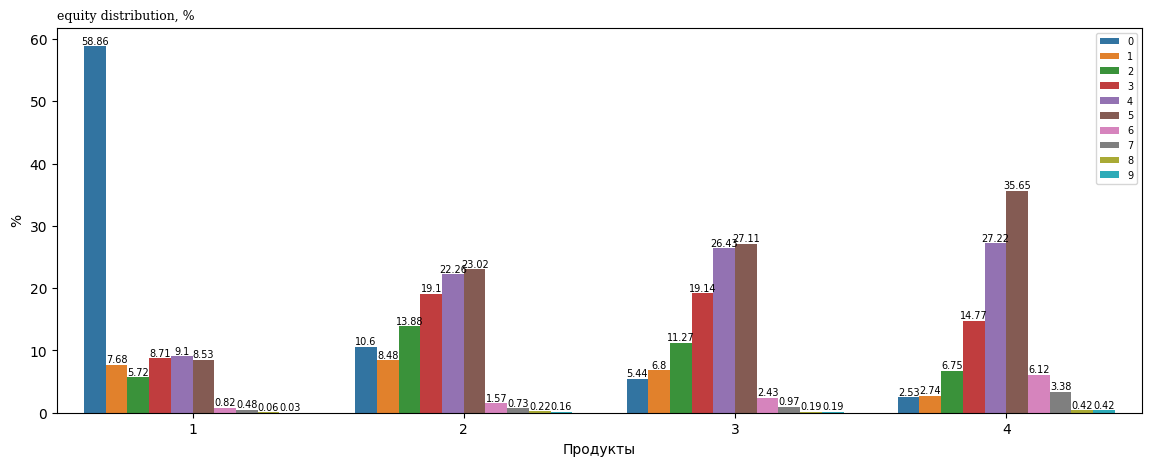

In [56]:
#график 
plt.figure(figsize=(14,5))

df_equity =df.groupby(['products', 'equity'])['userid'].count().reset_index()

df_equity_prod = df_equity[df_equity['products']==1]
df_equity_prod['%'] = round(df_equity_prod['userid']/df_equity_prod['userid'].sum()*100,2)

for i in range(2,5):
    x = df_equity[df_equity['products']==i]
    x['%'] = round(x['userid']/x['userid'].sum()*100,2)
    df_equity_prod = pd.concat([df_equity_prod, x], sort=False, axis=0)

    
ax =sns.barplot(y='%', x='products', data=df_equity_prod, hue = col, order = df_fig['products'].value_counts().index)
    
plt.legend(loc='best', fontsize= 7 )
ax.set(xlabel='Продукты', ylabel="%")
ax.set_title(f'{col} distribution, %',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'left')
for container in ax.containers:
    ax.bar_label(container=container, fontsize=7)
    


Самое распростарненное количество продуктов- 2 продукта, потом чуть поменьше 1, потом 3,4,5.  

По всем количествам продуктов больше всего пользователей из Ярославля.  

Женщины предобладают среди клиентов с 2мя или тремя продуктами, т.е. женщинам с одним продуктом, можно активнее предлагать второй. 

Трудоспособного возраста люди основные пользователи по всем кол-вам продуктам. Примечтельно, что в продуктах 3 пенсионный возрат больше молоддежи и вровен с предпенсионным возрастомт.  

Клиенты со средним доходом и выше среднего доминируют в каждой группе по кол-ву продуктов. Клиентов с высоким уровнем дохода в группе с 1 продуктом больше всего, чем в остальных группах, т.е. можно сказать что данной категории клиенты готовы на приоберетение 1 продукта.  

Как видим среди пользователей одним или двумя продуктами владельцев кредитных карт (КК) больше.Ситуация меняется при наличии трех продуктов - здесь владельцев КК меньше. Потом при 4 и 5 продуктах снова владельцев КК больше. Т.е. наличие трех продуктов -это та отметка, при которой пользователь может быть не заинтересован в КК.   
 
По оценке собственности можно заметить, что большое кол-во пользователей имеют один продукт при нулевой оценке  собсвенности.   

Среди пользователей с тремя продуктами больше неактивных пользователей чем активных. 

И среди них же доля ухода по отношению к оставшимся клиентов выше. А среди клиентов с 4 продуктами доля ушедших превышает оставшихся.

#### Город.

In [57]:
df_city = df.pivot_table(index = ['city', 'products'], values='userid' , aggfunc='count')
df_city.reset_index(inplace=True)
#df_city

In [58]:
df_city_rostov = df_city[df_city['city']=='Ростов']
df_city_rybinsk = df_city[df_city['city']=='Рыбинск']
df_city_yaroslavl = df_city[df_city['city']=='Ярославль']

In [59]:
df_city_rostov['% клиентов в городе'] =round(df_city_rostov['userid']/ df_city_rostov['userid'].sum()*100, 2)
#df_city_rostov

In [60]:
df_city_rybinsk['% клиентов в городе'] =round(df_city_rybinsk['userid']/ df_city_rybinsk['userid'].sum()*100, 2)
#df_city_rybinsk

In [61]:
df_city_yaroslavl['% клиентов в городе'] =round(df_city_yaroslavl['userid']/ df_city_yaroslavl['userid'].sum()*100, 2)
#df_city_yaroslavl

In [62]:
df_city=pd.concat([df_city_rostov,df_city_rybinsk,df_city_yaroslavl], sort=False, axis=0)
#df_city

In [63]:
fig = px.bar(df_city, x='products', y='% клиентов в городе', color='city', \
             text_auto=True, title ='Распределение числа продуктов по городам, их сравнение в %')
fig.show()

In [64]:
df_city = df.pivot_table(index = ['products', 'city'], values='userid' , aggfunc='count')
df_city.reset_index(inplace=True)
#df_city

In [65]:
df_city_prod = df_city[df_city['products']==1]
df_city_prod['%'] = round(df_city_prod['userid']/df_city_prod['userid'].sum()*100,2)

for i in range(2,5):
    x = df_city[df_city['products']==i]
    x['%'] = round(x['userid']/x['userid'].sum()*100,2)
    df_city_prod = pd.concat([df_city_prod, x], sort=False, axis=0)

In [66]:
fig = px.bar(df_city_prod, x='products', y='%', color='city', \
             text_auto=True, title ='Распределение числа продуктов по городам, их сравнение в %')
fig.update_layout(
     xaxis_title='Кол-во продуктов')

fig.show()

Как видим в разных городах в процентном соотношении одинаковое кол-во клиентов имеют в своем портфеле 1 и 4 продукта. Если взглянуть на 2 продукта, то в Ярославле число клиентов меньше,чем в других городах примерно на 10%. А число клиентов в Ярославле  с тремя продуктами в 2 раза больше,чем в других городах.   
Т.е. распределение жителей всех трех городов в целом идентично в % по кол-ву продуктов, но жителей Ярославля меньше в 2 продуктах на 10% и больше в 3 продуктах в 2 раза.  

Вывод(доп) по графику 'Распределение числа продуктов по городам №2, их сравнение в %':  
По каждому кол-ву продуктов видим, что в каждой группе больше половины пользователей из Ярославля. Выфделяется группа с 3 продуктами в ней аж 75%, т.е.2/3, из Ярославля и совсем малые процент Рыбинска и Ростова. Между группами 1 и 4 небольшая разница, распределение в чем-то схоже. 

#### Пол.

In [67]:
df_gender = df.pivot_table(index = ['gender','products'], values='userid' , aggfunc='count')
df_gender.reset_index(inplace= True )
#df_gender

In [68]:
df_gender_male = df_gender[df_gender['gender']=='М']
df_gender_female = df_gender[df_gender['gender']=='Ж']

In [69]:
df_gender_male ['% клиентов в группе'] = round(df_gender_male['userid']/ df_gender_male['userid'].sum()*100, 2 )
df_gender_female ['% клиентов в группе'] = round(df_gender_female['userid']/ df_gender_female['userid'].sum()*100, 2 )

In [70]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_gender_male['products'], y=df_gender_male ['% клиентов в группе'],\
                     name="Male", text=df_gender_male ['% клиентов в группе']))
fig.add_trace(
    go.Bar(x=df_gender_female['products'], y=df_gender_female ['% клиентов в группе'], \
           name="Female", text=df_gender_female ['% клиентов в группе']))

fig.update_layout(
     xaxis_title='Кол-во продуктов', yaxis_title="%", title_text='Распределение числа продуктов по полу',
)
fig.show()

Данный график еще раз пождтверждает, что женщины предобладают среди клиентов с 2мя или тремя продуктами, т.е. женщинам с одним продуктом, можно активнее предлагать второй. 

In [71]:
#### Возраст.

In [72]:
df_age = df.pivot_table(index = ['age','products'], values='userid' , aggfunc='count')
df_age.reset_index(inplace= True )
df_age.head()

age  products  userid
0  18.0         1       9
1  18.0         2       4
2  19.0         1       9
3  19.0         2       4
4  19.0         3       1

In [73]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_age[df_age['products']==1]['age'], y=df_age[df_age['products']==1]['userid'], name='1'))
fig.add_trace(go.Scatter(x=df_age[df_age['products']==2]['age'], y=df_age[df_age['products']==2]['userid'], name='2'))
fig.add_trace(go.Scatter(x=df_age[df_age['products']==3]['age'], y=df_age[df_age['products']==3]['userid'], name='3'))
fig.add_trace(go.Scatter(x=df_age[df_age['products']==4]['age'], y=df_age[df_age['products']==4]['userid'], name='4'))
fig.update_layout(
     title_text='Динамика числа клиентов в разрезе продуктов по возрастам',
     #title_font_size=20,
     xaxis_title='Возраст',
     xaxis_rangeslider_visible=True  # слайдер
 )

fig.show()


Графики 1 и 2х продуктов близко расположены друг к другу и в целом похожи. То же самое с продуктами 3 и 4. Графики 1 и 2 имеют ярко выраженные пики в 30-40 лет, в то время как 3 и 4 более сглажены,хотя на 30-40 лет тоже приходятся максимальные значения.

In [74]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df[df['products']==1]['age'], name='1', histnorm='probability density',opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['products']==2]['age'], name='2', histnorm='probability density',opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['products']==3]['age'], name='3', histnorm='probability density',opacity=0.5))
fig.add_trace(go.Histogram(x=df[df['products']==4]['age'], name='4', histnorm='probability density',opacity=0.5))
fig.update_layout(
     title_text='Гистограмма возрастов по количеству продуктов в портфеле клиента',
     #title_font_size=20,
     xaxis_title='Возраст', barmode='overlay'    
      )

fig.show()

В группах преобладают люди 25-65 лет.
Максимальные значения у всех групп в возрасте 30-40 лет, есть выбивающиеся ввысь возрасты с 4 продуктами. Клиенты с 3мя продуктами преобладают в возрасте после 60 лет.


#### ЗП

In [75]:
df_est_salary = df.groupby('products')['est_salary'].median().reset_index()
df_est_salary.head()

products  est_salary
0         1  142183.095
1         2  109691.800
2         3  105718.880
3         4  122472.510

In [76]:
fig = px.bar(df_est_salary, x='products', y='est_salary', text_auto=True, \
             title ='Медианные значения ЗП в группах')
fig.update_layout(
      xaxis_title='Кол-во продуктов'    
      )
fig.show()

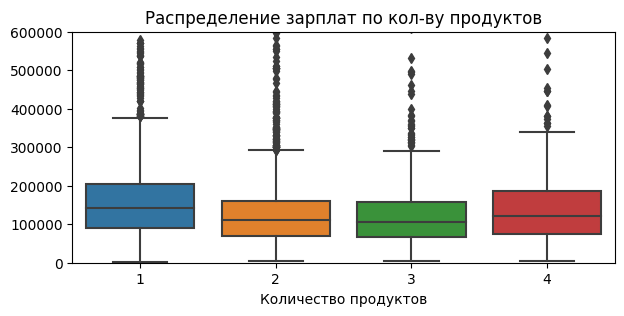

In [77]:
sns.boxplot(data=df, x='products', y='est_salary').set(title='Распределение зарплат по кол-ву продуктов') 
plt.ylim (0, 600000)
plt.xlabel('Количество продуктов')
plt.ylabel(None);

Самые высокие зп в группе с 1 продуктом. Посмотрим баланс клиентов совместно с этой информацией.  

#### Баланс.

In [78]:
df_est_balance = df.groupby('products')['balance'].median().reset_index()
df_est_balance.head()

products     balance
0         1  415369.490
1         2  516537.740
2         3  667290.900
3         4  939342.895

In [79]:
fig = px.bar(df_est_balance, x='products', y='balance', text_auto=True, \
             title ='Медианные значения баланса в группах')
fig.update_layout(
     xaxis_title='Кол-во продуктов'    
      )
fig.show()

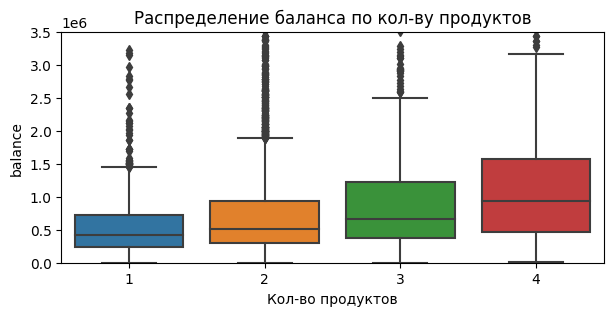

In [80]:
sns.boxplot(data=df, x='products', y='balance').set(title='Распределение баланса по кол-ву продуктов') 
plt.ylim (0, 3500000)
plt.xlabel('Кол-во продуктов');

Изучив баланс можно сказать, что один продукт имеют люди с немаленькими ЗП, а учитывая что скорее всего пользуются они КК, то вырисовывается картина, что человек при необходимости берут КК. Посмотри оценку собсьвенности вдовесок.  

#### Оценка собственности.

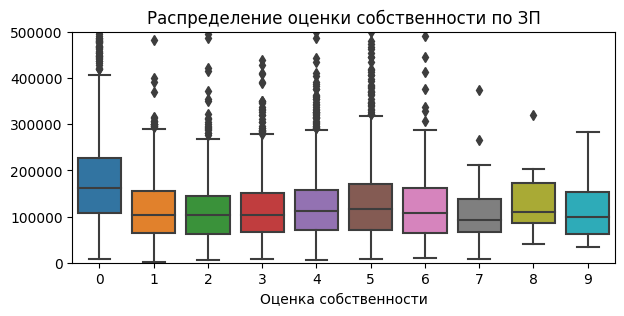

In [81]:
sns.boxplot(data=df, x='equity', y='est_salary').set(title='Распределение оценки собственности по ЗП') 
plt.ylim (0, 500000)
plt.xlabel('Оценка собственности')
plt.ylabel('');

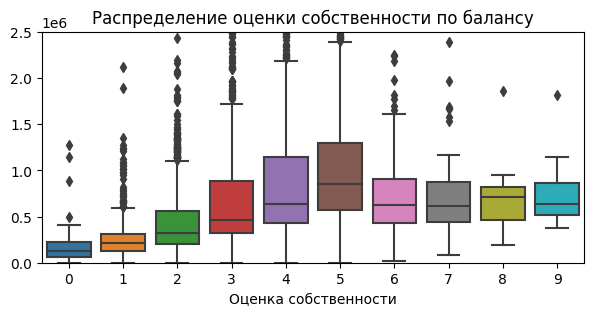

In [82]:
sns.boxplot(data=df, x='equity', y='balance').set(title='Распределение оценки собственности по балансу') 
plt.ylim (0, 2500000)
plt.xlabel('Оценка собственности')
plt.ylabel('');

Из графиков можно заключить что ЗП не влияет абсолютно на оценку собсвенности. Чем выше баланс,тем выше оценка. 

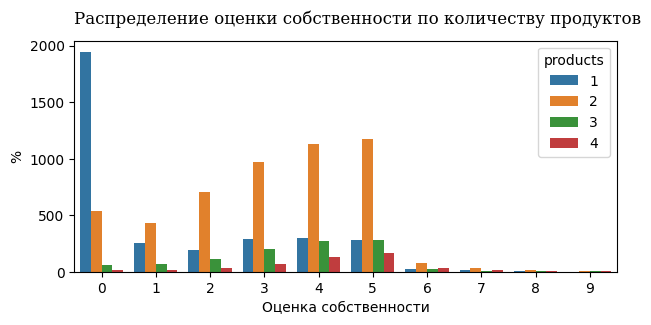

In [83]:
sns.countplot(x='equity', data=df, hue = 'products')
plt.xlabel('Оценка собственности')
plt.ylabel('%')
plt.title('Распределение оценки собственности по количеству продуктов',fontdict= {'fontsize': 12, 'fontfamily':'serif'}, loc = 'left', y=1.04);

Сразу видим, что при нулевой оценке большое кол-во клиентов с 1 продуктом. Кол-во клиентов с 2,3 и 4 продуктами увеличивается с оценкой до 5,чем выше оценка тем больше клиентов с 2мя продуктами.Но начиная с оценки 6 кол-во клиентов крайне мало и разбросано, четкой закономерности не выявить на основании только этих данных.

#### Оценка кредитного скоринга.

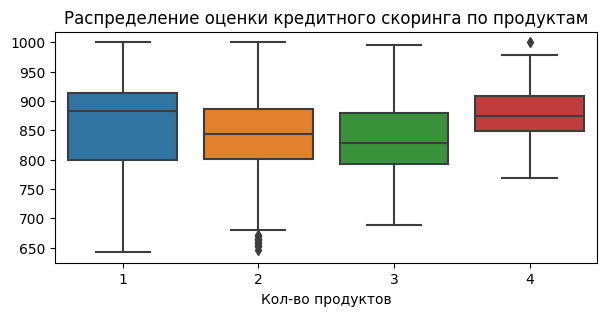

In [84]:
sns.boxplot(data=df, x='products', y='score').set(title='Распределение оценки кредитного скоринга по продуктам') 
#plt.ylim (0, 2500000)
plt.ylabel(None)
plt.xlabel('Кол-во продуктов');

In [85]:
df_score = df.groupby('score_group')['userid'].count().reset_index()
df_score['%'] = round (df_score['userid']/ df_score['userid'].sum()*100,2)
df_score

score_group  userid      %
0      низкий     671   6.78
1    отличный     924   9.33
2     хороший    8309  83.90

In [86]:
fig = px.bar(df_score, x='score_group', y='%', text_auto=True, \
             title ='Распределение клиентов по оценкам кредитного скоринга')
fig.update_layout(
     xaxis_title='Оценка кредитного скорринга'    
      )
fig.show()

Как видим преимущественно по всем кол-вам продуктов высокие баллы скоринга. 

#### Активность.

In [87]:
df_act = df.pivot_table(index=['products','last_activity'], values= 'userid', aggfunc='count').reset_index()
#df_act

In [88]:
df_act_1= df_act[df_act['products']==1]
df_act_2= df_act[df_act['products']==2]
df_act_3= df_act[df_act['products']==3]
df_act_4= df_act[df_act['products']==4]

In [89]:
df_act_1['%']=round(df_act_1['userid']/df_act_1['userid'].sum()*100,2)
df_act_2['%']=round(df_act_2['userid']/df_act_2['userid'].sum()*100,2)
df_act_3['%']=round(df_act_3['userid']/df_act_3['userid'].sum()*100,2)
df_act_4['%']=round(df_act_4['userid']/df_act_4['userid'].sum()*100,2)

In [90]:
df_act_1

products  last_activity  userid      %
0         1          False    1561  47.22
1         1           True    1745  52.78

In [91]:
fig = go.Figure()
fig.add_trace(go.Bar(x=df_act_1['last_activity'], y=df_act_1 ['%'], name="1", text=df_act_1 ['%']))

fig.add_trace(go.Bar(x=df_act_2['last_activity'], y=df_act_2 ['%'],\
                     name="2", text=df_act_2 ['%']))

fig.add_trace(go.Bar(x=df_act_3['last_activity'], y=df_act_3 ['%'],\
                     name="3", text=df_act_3 ['%']))

fig.add_trace(go.Bar(x=df_act_4['last_activity'], y=df_act_4 ['%'],\
                     name="4", text=df_act_4 ['%']))
fig.update_layout(
     xaxis_title='Кол-во продуктов', yaxis_title="%", title_text='Распределение активных/неактивных по продуктам',
)
fig.show()

Итак, больше всего активных пользователей в группе 4 - 78,9% от числа группы 4,неактивных пользователей в группе 3-58,11% от числа группы 3. Примечательно, что % разрыв между активными и неактивными в группах 1и 2 не превышает 5 пунктов.

#### Уход.

In [92]:
#переведем True и False в числовые значения
def churn(x):
    if x==True:
        return 1
    else:
        return 0

In [93]:
df['churn_num']=df['churn'].apply(churn)

In [94]:
df_churn = df.pivot_table(index=['products','churn_num'], values= 'userid', aggfunc='count').reset_index()
#df_churn

In [95]:
df_churn_1= df_churn[df_churn['products']==1]
df_churn_2= df_churn[df_churn['products']==2]
df_churn_3= df_churn[df_churn['products']==3]
df_churn_4= df_churn[df_churn['products']==4]

In [96]:
df_churn_1

products  churn_num  userid
0         1          0    3071
1         1          1     235

In [97]:
df_churn_1['%']=round(df_churn_1['userid']/df_churn_1['userid'].sum()*100,2)
df_churn_2['%']=round(df_churn_2['userid']/df_churn_2['userid'].sum()*100,2)
df_churn_3['%']=round(df_churn_3['userid']/df_churn_3['userid'].sum()*100,2)
df_churn_4['%']=round(df_churn_4['userid']/df_churn_4['userid'].sum()*100,2)

In [98]:
df_churn_1

products  churn_num  userid      %
0         1          0    3071  92.89
1         1          1     235   7.11

In [99]:
fig = go.Figure()

fig.add_trace(go.Bar(x=df_churn_1['churn_num'], y=df_churn_1['%'], name="1", text=df_churn_1['%']))

fig.add_trace(go.Bar(x=df_churn_2['churn_num'], y=df_churn_2['%'], name="2", text=df_churn_2['%']))

fig.add_trace(go.Bar(x=df_churn_3['churn_num'], y=df_churn_3['%'], name="3", text=df_churn_3['%']))

fig.add_trace(go.Bar(x=df_churn_4['churn_num'], y=df_churn_4['%'], name="4", text=df_churn_4['%']))

fig.update_layout(
     xaxis_title='0- остался, 1-ушел', yaxis_title="%", title_text='Распределение ушедших и нынешних клиентов по продуктам',
)
fig.show()

Самый низкий процент ухода в группе 1, самый высокий в группе 4.

### Соотношение категорий пользователей с доходом.

In [100]:
#выведем столбцы, для которых будет анализ, equity будем рисовать отдельно для читаемости 
explore_columns= df[['city', 'gender', 'age_group', 'profit', 'credit_card', 'score_group','last_activity', 'churn', 'balance_group']]
explore_columns.head()

city gender       age_group         profit  credit_card score_group  \
0    Рыбинск      Ж        молодежь        средний        False     хороший   
1    Рыбинск      Ж  трудоспособный        средний         True     хороший   
2    Рыбинск      Ж        молодежь        средний         True     хороший   
3  Ярославль      Ж  предпенсионный  выше среднего        False     хороший   
4  Ярославль      М  трудоспособный        средний         True      низкий   

   last_activity  churn balance_group  
0           True   True          None  
1          False  False    > 600 тыс.  
2           True  False          None  
3           True   True    > 600 тыс.  
4          False   True    < 100 тыс.

In [101]:
columns = explore_columns.columns[explore_columns.columns!='profit']
columns

Index(['city', 'gender', 'age_group', 'credit_card', 'score_group',
       'last_activity', 'churn', 'balance_group'],
      dtype='object')

In [102]:
#функция для графиков распределения по характеристикам 

def distr_by_col (distr):
#distr -столбец,который исследуем по другим хар-кам юзеров
#col - характеристики юзеров

    columns = explore_columns.columns[explore_columns.columns!=distr]#исключаем исследуемый столбец из хар-к

    fig, ax = plt.subplots(4, 2, figsize=(14, 18))
    fig.suptitle(f'Распределение {distr} по характеристикам пользователей, %' , label= 'right', y=0.93)
    plt.subplots_adjust(wspace=0.2, hspace=0.2) 
    ax = ax.flatten()

    for num, col in enumerate(columns):
        #датасет с группировкой по исследуемому признаку 
        df_fig = df.groupby([distr, col])['userid'].count().reset_index()
      

        #подсчет процентов в разрезе характеристик
        df_fig_distr= pd.DataFrame(columns=[distr, col, 'userid'])
        #пустой датафрейм, будем добавлять в него подсчеты 
        #distr - исследуемый столбец 
        #col - в разрезе каких хар-к
        # userid- кол-во клиентов 

        unique = df_fig[distr].unique() #получение значений в исследуемом признаке
    
        #посчет процентов, формирование ДФ для построения графика, построение графика по нему
        
        for i in range(len(unique)):
            
                     
            #отсортируем датафрейм по одному исследуемому значению, запишем в ДФ
            y = df_fig[df_fig[distr]==unique[i]]
            
            #посчитаем проценты
            y['%'] = round(y['userid']/y['userid'].sum()*100,2)  
            
            #добавим полученый ДФ
            df_fig_distr = df_fig_distr.append(y)   
            
            #построение графика
            
        sns.barplot(y='%', x=distr, data=df_fig_distr, hue = col, ax = ax[num], order = df_fig[distr].value_counts().index)
        ax[num].set_yticklabels(ax[num].get_yticklabels(),fontsize=7)
    #ax[num].set_xticklabels(ax[num].get_xticklabels(), fontsize=7)
        #ax[num].set(xlabel=None, ylabel=None)
        ax[num].set_title(f'{col} distribution',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'left')
    
        for container in ax[num].containers:
            ax[num].bar_label(container=container, fontsize=7)
    

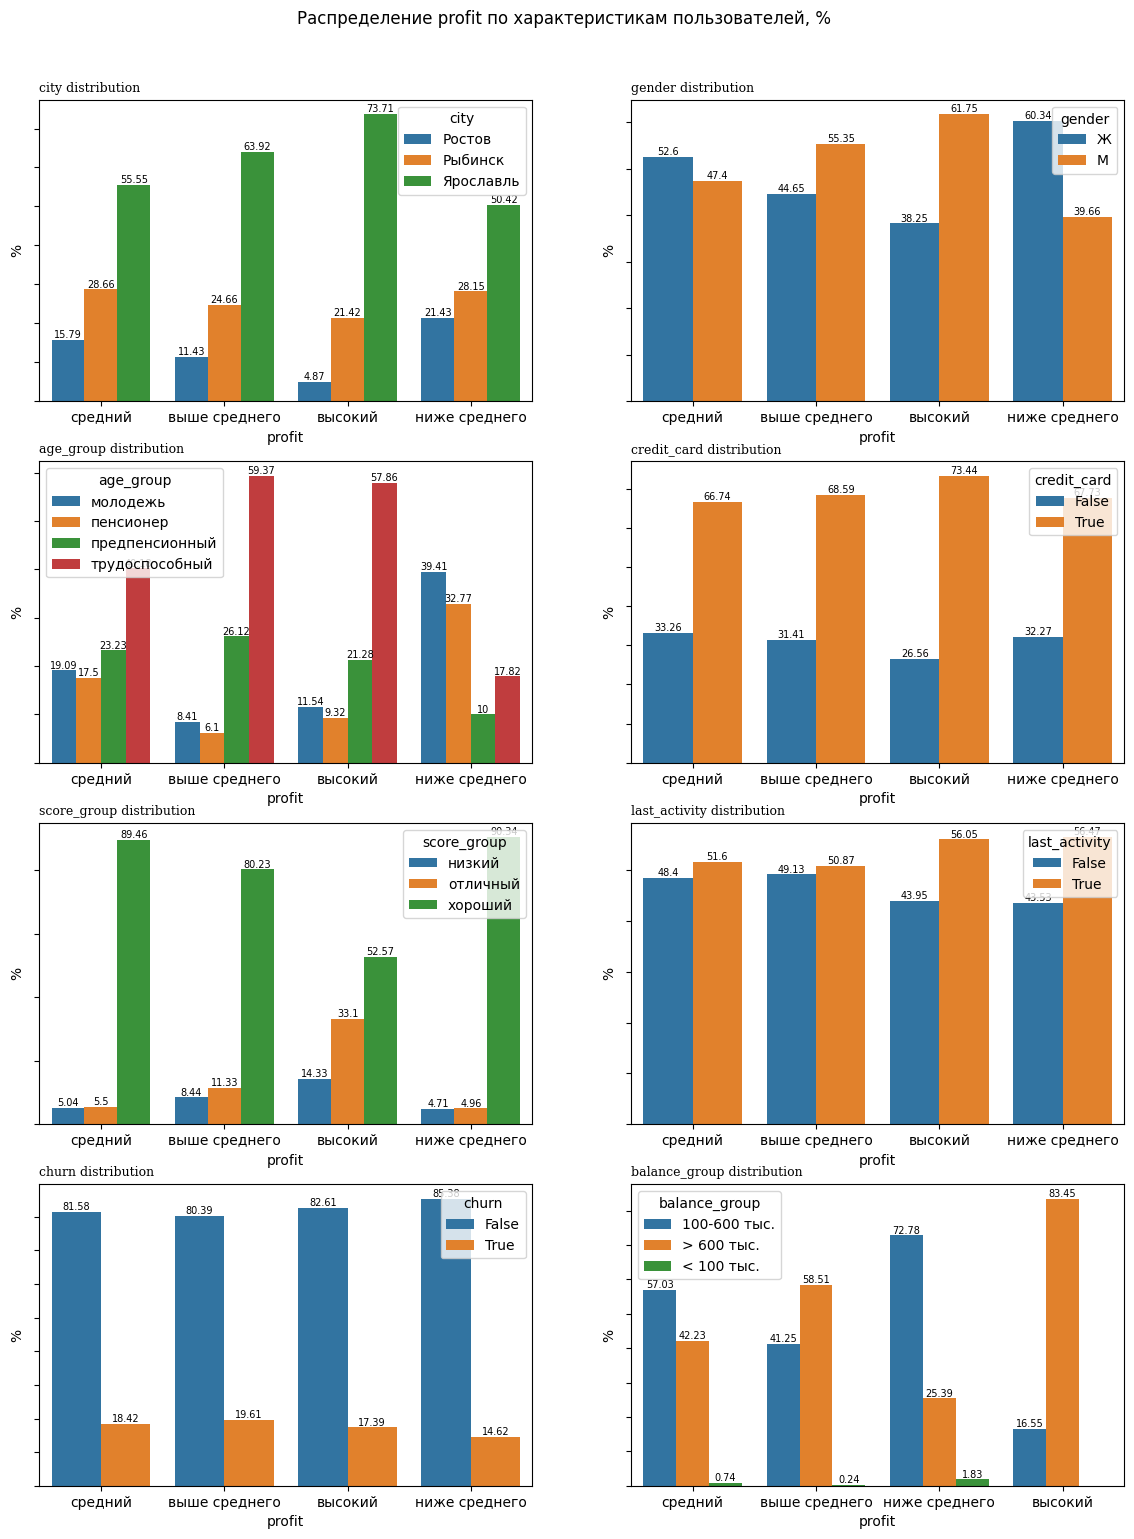

In [103]:
distr_by_col('profit')

Самое явное расслоение среди клиентов Ярославля.  

Мужчины состоятельнее. Женщин больше с доходом средним и ниже среднего. Мужчин больше с доходом выше среднего и высоким.

Среди трудоспособного населения основная часть со средним доходом и выше среднего. Также в этой категории больше всего клиентов с высоким доходом. Больше всего клиентов с низким доходом среди пенсионеров и молодежи.

Общая тенденция: средний доход, выше среднего, ниже среднего, высокий. Обеспеченных меньше всего.

Кредитную карту имеют в 2 раза больше пользователей по всем группам доходов.

В оценке кредитного скоринга хороший повторяется общая тенденция - самый распространенный средний доход, нераспростарненный - высокий. В отличной и низкой оценке значения по группам доходам малы, причем самая распростаненный доход - выше среднего, нераспространенный - ниже среднего.

в оценке собсвенности самая многочисленная группа при оценке 0 с доходом выше среднего.

Среди пользователей 2,3и 4х продуктов порядок доходов согласно общей тенденции с равномерным уменьшением ппользователей по группа. Среди пользователей одного продукта доминирует средний и выше среднего доход.Высокий доход больше дохода ниже среднего.

Аквтивных и неактивных идентичное кол-во.

Кол-во ушедших клиентов по группам доходов пропорционально оставшимся.

### Соотношение категорий пользователей и баллов кредитного скоринга.

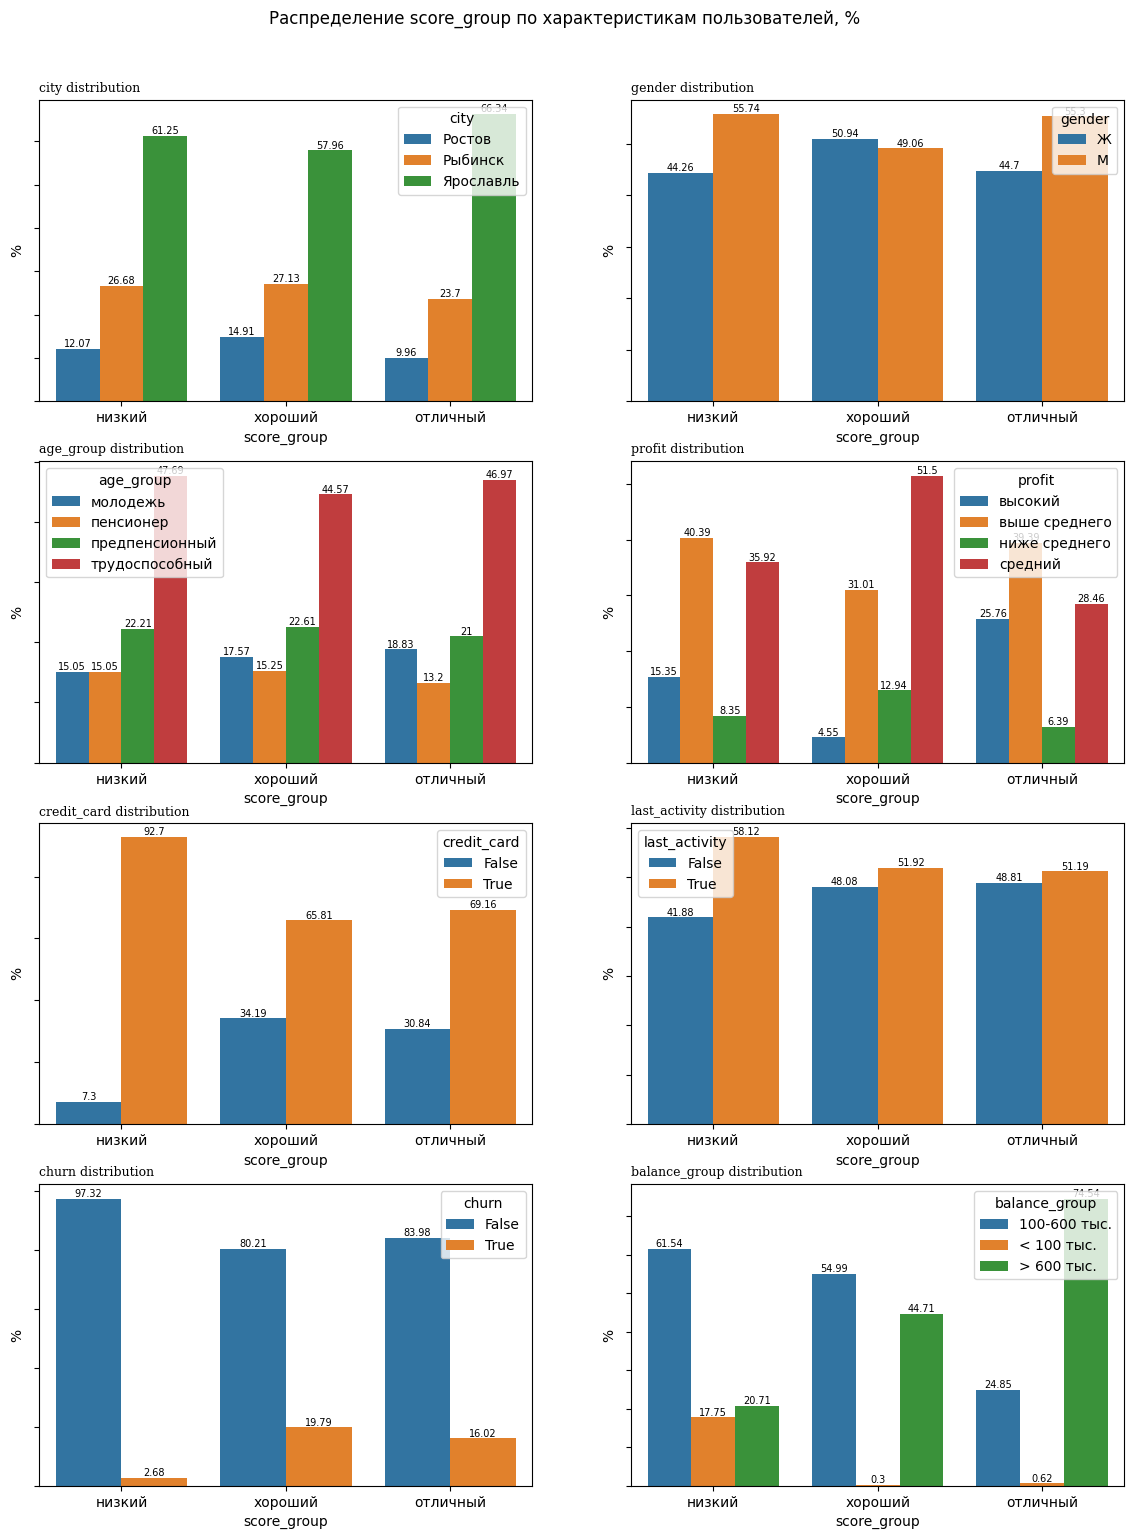

In [104]:
distr_by_col('score_group')

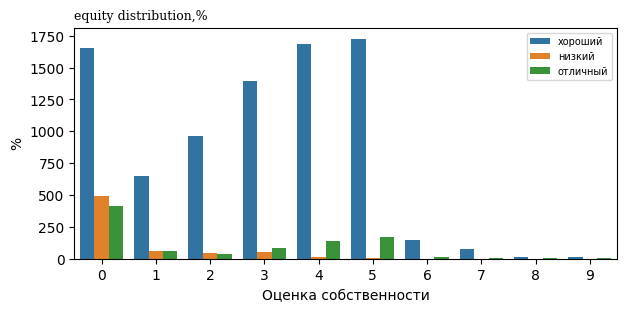

In [105]:
sns.countplot(x='equity', data=df, hue = 'score_group')
plt.ylabel('%')
plt.xlabel('Оценка собственности')
plt.title('equity distribution,%',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'left')
plt.legend(loc='upper right', fontsize= 7 );

Итак, рассматривая графики слева направо построчно.  

Если в Рыбинске и Ростове пользователей  с оценкой отличный и низкий практически одинаковое количество, то в Ярославле пользвателей с отличной оценкой больше, чем с низкой. Ярославль более крупный город и расслоение там более явное.   

Распределение оценок среди мужчин и женщин идентичны. Женщин с хорошей кредитной оценкой вышей.

Среди пенсионеров практически одинаковое количество оценок низкий и отличный, более особенностей не вижу.  

Есть пользователи,которые при доходе ниже среднего имеют отличную оценку. Их такое же кол-во что и пользователей с низкой оценкой. И также есть клиенты, которые имеют низкую оценку при высоком доходе.

Кредитная карта выдается в одинаковых количествах пользователям с низкой оценкой и с высокой. Среди пользователей с низкой  оценкой мало у кого нет кредитной карты.  

Общая тенденция - больше всего пользователей с оценкой кредитного скоринга хороший - 8000, низкий и отличный менее 2000.

В распределении оценке собственности видим несоблюдение общей тенденции:при оценке собственности в 0 клиентов с низкой оценкой больше, чем с отличной. с оценкой 0 все группы кредитного скоринга представлены явно. Начиная с оценки собственности в 6 доля пользователей с низкой оценкой скоринга практически нулевая. Причем и пользвателей с другими оценками также стремительно снижается. При оценке пользователей в 4 и 5 доля отличных оценок скоринга превышает значительно низкие оценки. 

В группах 1,2,3, 4 продукта преобладает score_group хороший. Низкая и отличная оценка наравне в группе с 1 продуктом,т.е. на получение 1 продукта имеют равные шансы и возможности любая группа score_group. 

Среди активных и неактивных клиентов распределение по оценкам идентичное, хотя среди активных доля с хорошей оценкой немного выше.    

Среди ушедших клиентов практически нет клиентов с низкой оценкой.  

### Соотношение категорий пользователей с наличием кредитной карты.


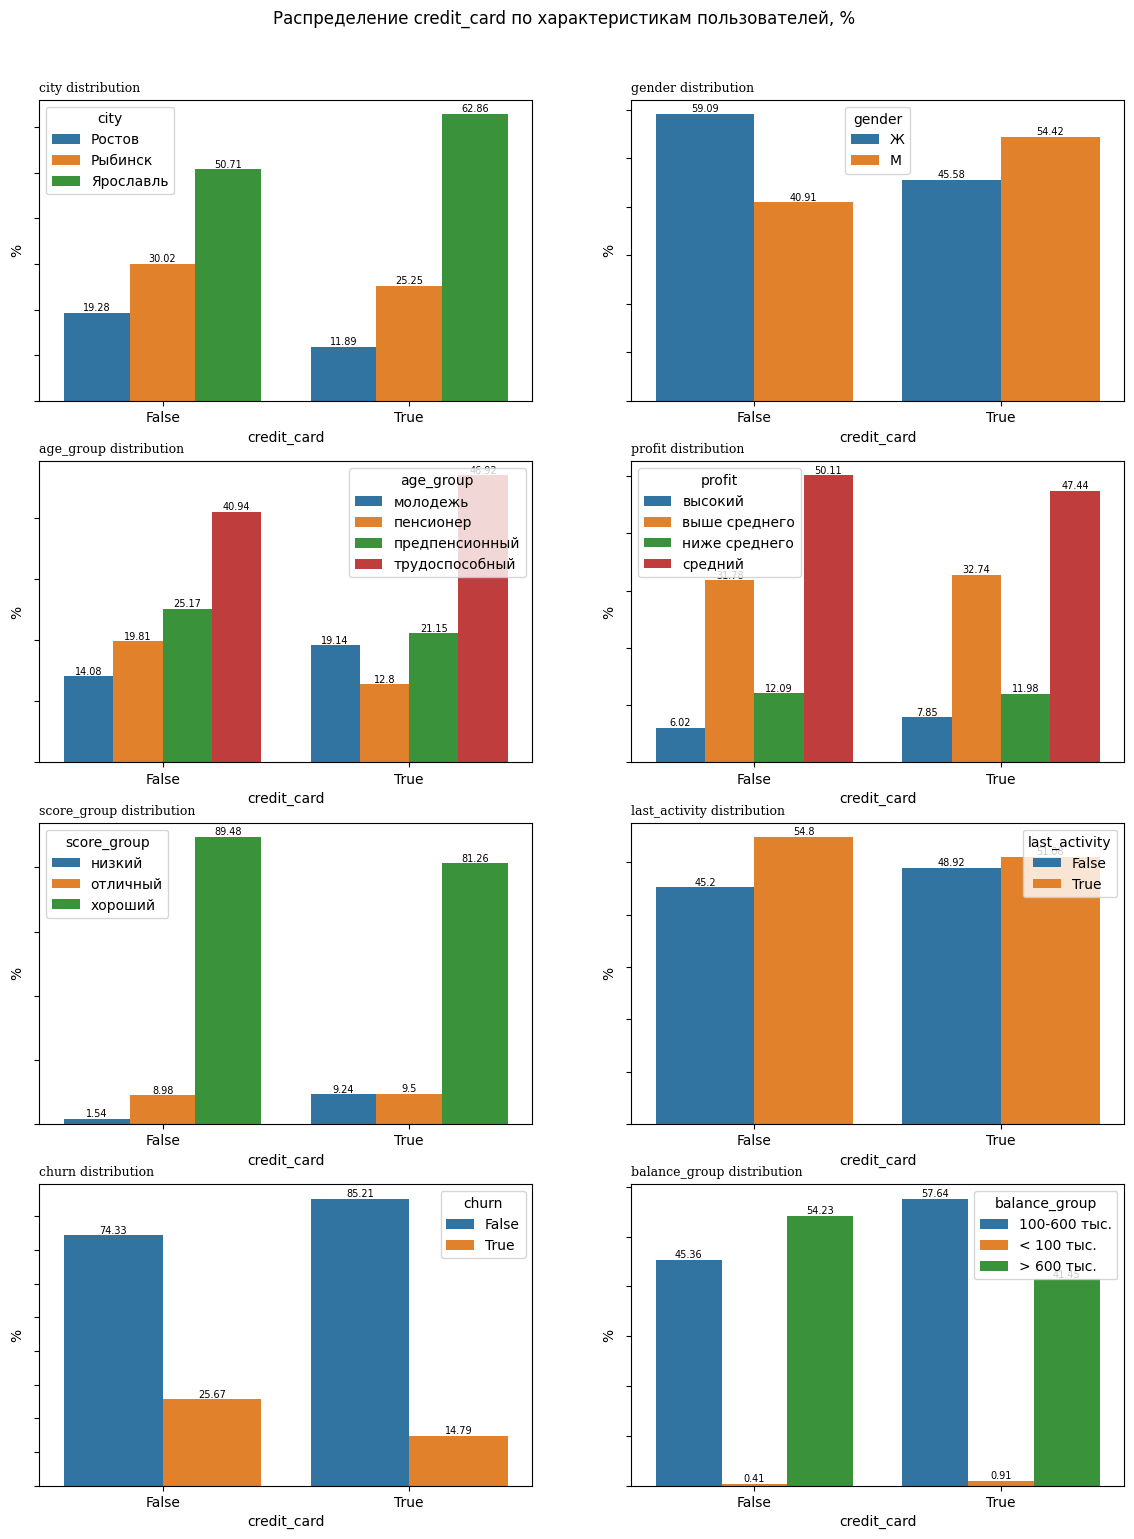

In [106]:
distr_by_col('credit_card')

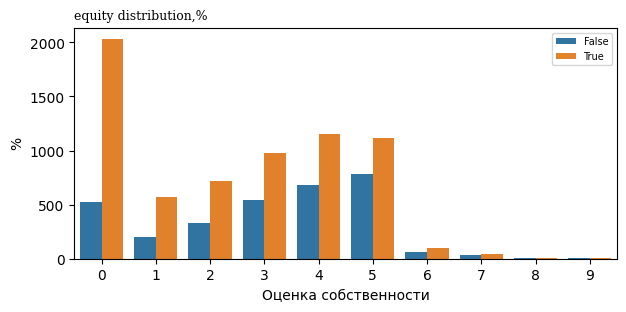

In [107]:
sns.countplot(x='equity', data=df, hue = 'credit_card')
plt.ylabel('%')
plt.xlabel('Оценка собственности')
plt.title('equity distribution,%',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'left')
plt.legend(loc='upper right', fontsize= 7 );

Пользователи Ярослаля лояльны к кредитным картам. Жители Ростова менее.

Мужчины более склонны к заведению КК.   

Трудоспособные граждане заинтерсованы в КК. Молодежь и люди предпенсионного возраста скорее всего также больше заинтересуются КК , чем нет. Нельзя однозначно сказать про пенсионеров разница владельце и невладельцев КК не так значительня как в других группах.   

Пользователи с разным достатком -владельцев КК больше в 2 раза тех у кого нет КК соотвественно.   

2/3 пользователей - это владельцы КК.

Пользователей с нулевой оценкой собственности можно назвать целевой группой для КК.  

Пользователи одного продукта - это скорее владельцы КК. У тех кого 2 продукта, один из них КК.  

Распределение владельцнв КК идентична: активных больше.  

Уход среди владельцев КК и невладельцев одного порядка, не сильно различен. Т.е. КК не вляет на уход клиента.  

### Соотношение категорий пользователей с активностью.


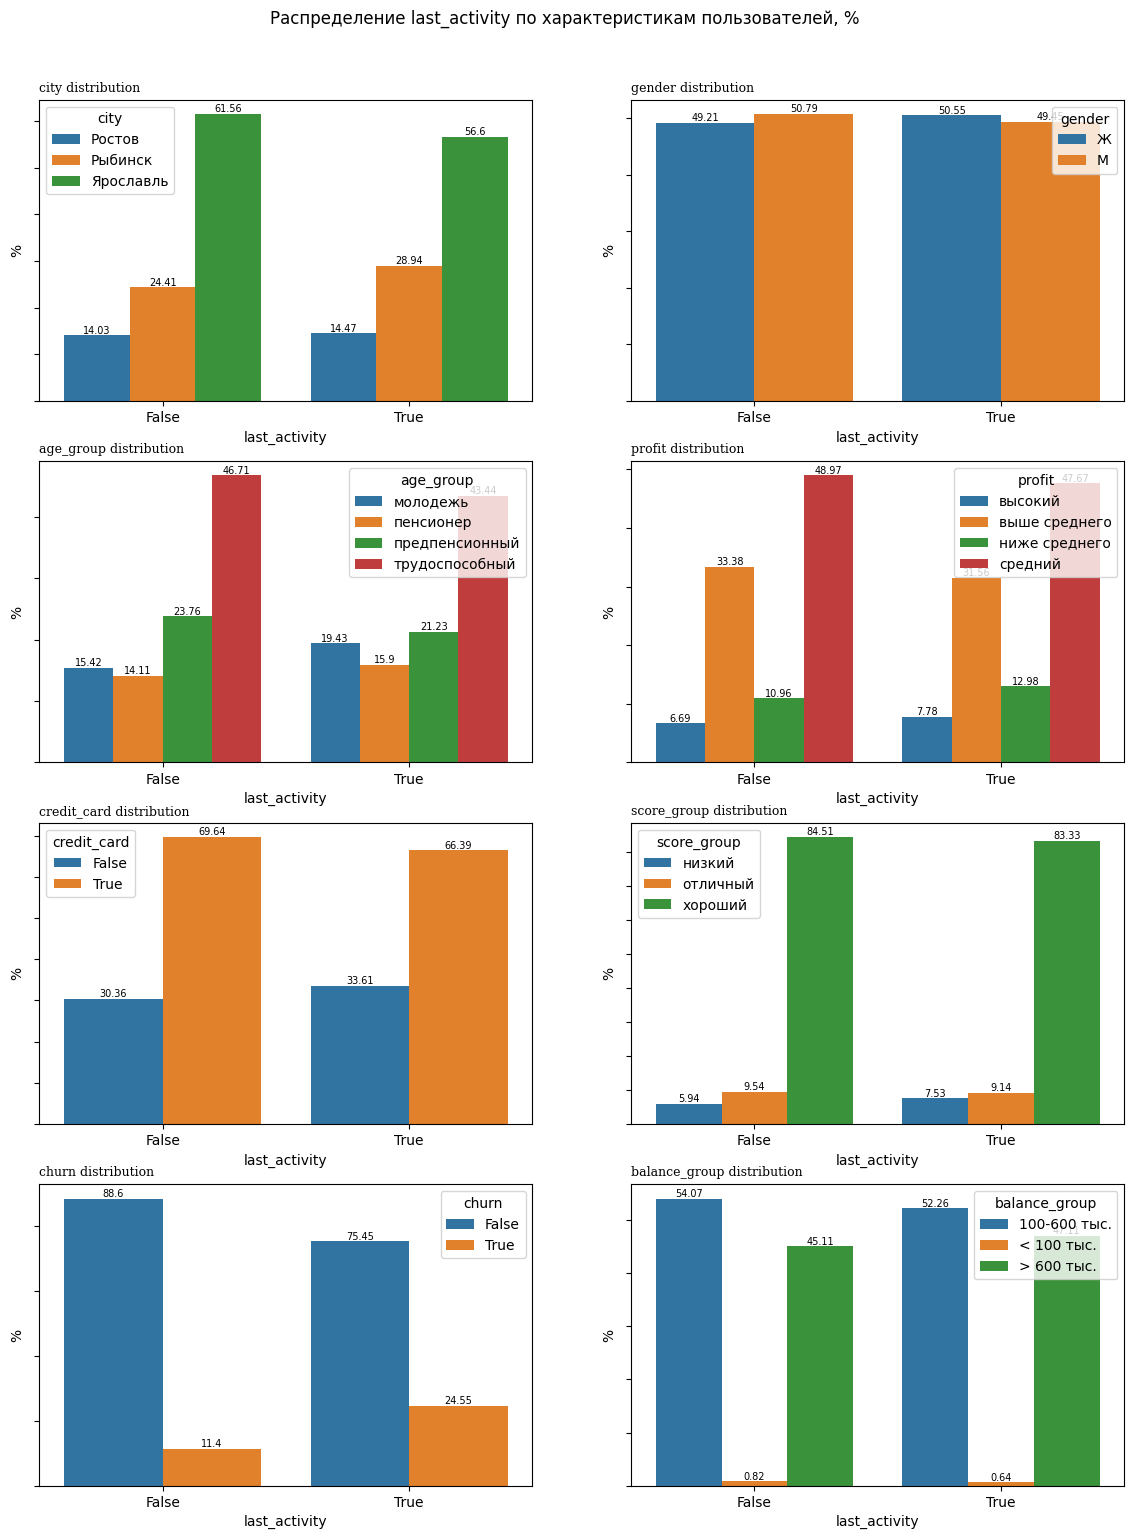

In [108]:
distr_by_col('last_activity')

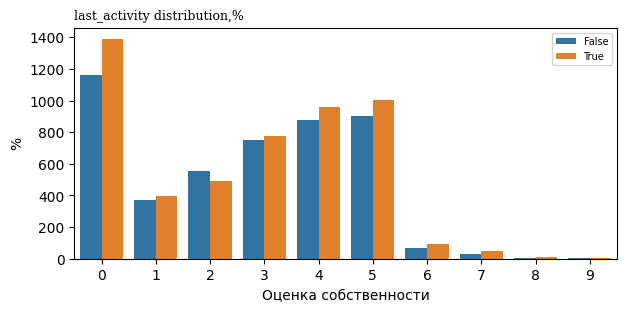

In [109]:
sns.countplot(x='equity', data=df, hue = 'last_activity')
plt.ylabel('%')
plt.xlabel('Оценка собственности')
plt.title('last_activity distribution,%',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'left')
plt.legend(loc='upper right', fontsize= 7 );

По городам выделяется Рыбинск, активных больше неактивных.  
Женщины более активны.  
Активной молодежи и пенсионеров больше, чем неактивных.  
Среди держателей карти активность/неактивность идентична.  
Пользовтели разного достатка больше активных, чем неактивных.  
Клиентов с оценкой собственности 0 бльше активных, неактивных пользователей с оценкой 2 больше, чем активных.  
НЕактинвых пользователей трех продуктов больше, чем активных. 
Уход среди активных пользователей больше чем уход неактивных. Т.е. уход не зависит напрямую от активности.   

### Соотношение категорий пользователей с уходом.

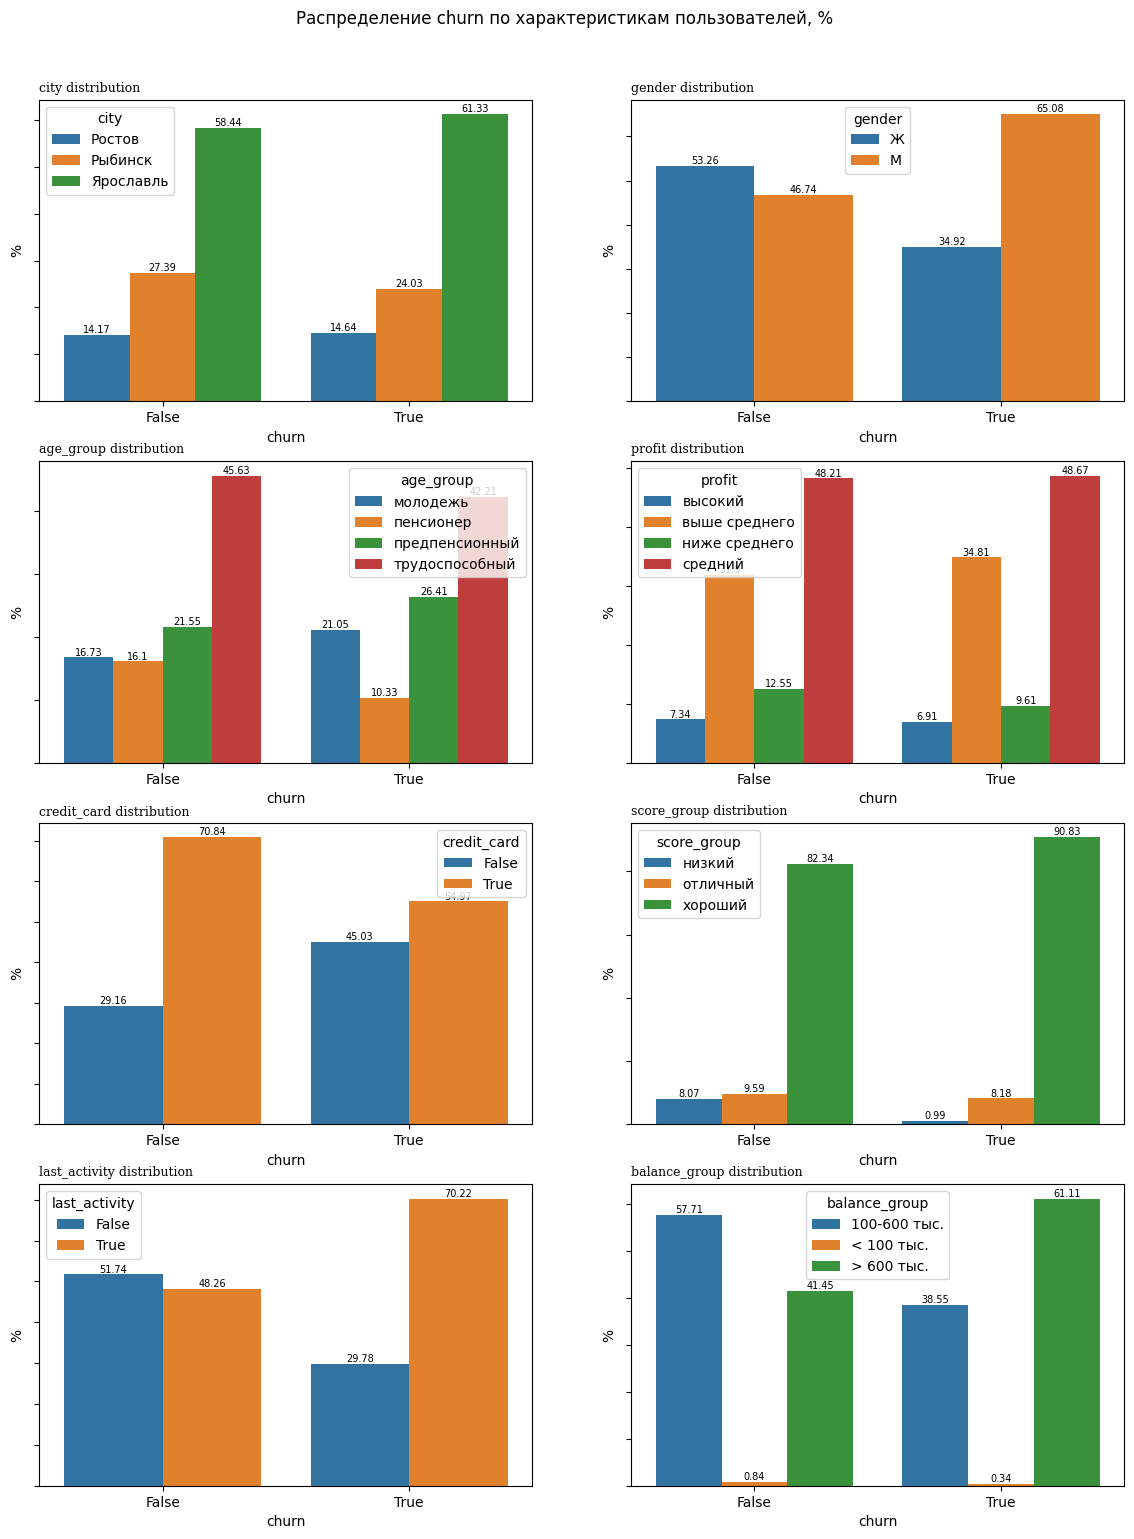

In [110]:
distr_by_col('churn')

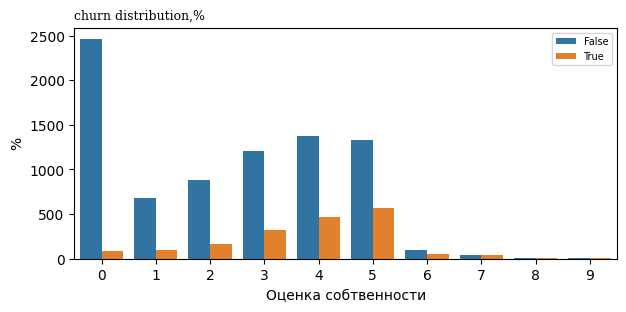

In [111]:
sns.countplot(x='equity', data=df, hue = 'churn')
plt.ylabel('%')
plt.xlabel('Оценка собтвенности')
plt.title('churn distribution,%',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'left')
plt.legend(loc='upper right', fontsize= 7 );

Распределение ушедших и оставшихся клиентов по городам индентичное.   

Мужчины уходят чаще.  

Распределение по возрасту идентичное среди ушедших и оставшихся, не вижу особенностей.

Чаще всего уходят клиенты со средним доходом и выше среднего.  

Знгачительно чаще остаются клиенты, которые владели КК.

При хорошей оценке кредитного скоринга клиент уходит в немалой доле. Практически не уходтя клиенты с низкой оценкой.  

Активные клиенты уходят чаще, скорее всего ищут выгодные предложения в других банках.

По граафику люди с балансов больше 600 тыс. чаще уходят. Проверим как раз это как статистическую гипотезу. 

# Проверка статистических гипотез.  
Проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.

Проверка гипотезы, что клиенты с высоким балансом (или мбожно рассмотреть еще ЗП) более стабильны и менее склоны к оттоку. 
## Проверка гипотезы различия возраста между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним.  

Нулевая гипотеза: Возрасты клиентов, у которых два и один продукт равны.   
Альтернативная гипотеза: Возрасты клиентов, у которых два и один продукт различны. 
alpha = 0.05 # уровень статистической значимости

Выведем возрасты для клиентов с одним продуктом и с двумя.

In [112]:
# df_prod_1 = df[df['products']==1]
# #df_prod_1

In [113]:
# df_prod_2 = df[df['products']==2]
# #df_prod_2

Т.к. обе генеральные совокупности большие и не зависимы друг от друга, будем сравнивать средние по выборкам из каждой совокупности методом для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам: scipy.stats.ttest_ind (array1, array2, equal_var). 

In [114]:
Сформируем данные для АВ-теста, создадим таблицы с данными по возрастам и кол-ве клиентов в каждом возрасте 

SyntaxError: invalid syntax (3314160069.py, line 1)

In [ ]:
df_prod_A = df[df['products']==1][['age','userid']].sort_values(by = 'age').reset_index(drop=True)
df_prod_B = df[df['products']==2][['age','userid']].sort_values(by = 'age').reset_index(drop=True)

In [ ]:
df_prod_A = df_prod_A.groupby('age')['userid'].count().reset_index().sort_values(by = 'age').reset_index(drop=True)
df_prod_A.columns= ['age', 'userid_A']
#df_prod_A

In [ ]:
df_prod_B = df_prod_B.groupby('age')['userid'].count().reset_index().sort_values(by = 'age').reset_index(drop=True)
df_prod_B.columns= ['age', 'userid_B']
#df_prod_B

In [ ]:
#создаем пустой ДФ со всеми возрастами от 18 до 86
age_main = pd.Series(0,index=np.arange(18,86))
age_main = age_main.to_frame (name = 'age_main')
age_main.reset_index(inplace= True )
age_main.columns = ['age','age_main']
#age_main

In [ ]:
df_prod_A['age'] = df_prod_A['age'].astype (int)
df_prod_B['age'] = df_prod_B['age'].astype (int)
#df_prod_A

In [ ]:
df_prod_A.columns

In [ ]:
data= age_main.merge(df_prod_A,  how='left', on ='age')
#data

In [ ]:
data= data.merge(df_prod_B,  how='left', on ='age')
#data

In [ ]:
data[['userid_A', 'userid_B']] = data[['userid_A', 'userid_B']].fillna(0)
data = data[['age', 'userid_A', 'userid_B']]
#data

In [ ]:
#выборки для сравнения
sampleA = data['userid_A']
sampleB = data['userid_B']

Проверим выборки на нормальность распределения методом Шапиро-Уилка.

In [ ]:
alpha = 0.05  

results = st.shapiro(sampleA)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Распределение выборки А не нормально')
else:
    print('Распределение выборки А нормально')

In [ ]:
alpha = 0.05  

results = st.shapiro(sampleB)
p_value = results[
    1
]  # второе значение в массиве результатов (с индексом 1) - p-value

print('p-значение: ', p_value)

if p_value < alpha:
    print('Распределение выборки B не нормально')
else:
    print('Распределение выборки B нормально')

Итак, имеем 2 ненормально распределенные совокупности. Основные методы проверки гипотез - метод Стьюдента и Манна-Уитни. Наша выборки ранжирована и имеет не так много значений -68. По теории проверка Манна-Уитни применяется на малых ранжированных выборках до 60 значений. А выборки у нас ранжированы и не сказать,что большие -68 значений в выборках. Поэтому проверим обеими методами.

In [ ]:
#Манна-Уитни

results = st.mannwhitneyu(sampleA, sampleB)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя') 

In [ ]:
#Стьюдента

results = st.ttest_ind(sampleA, sampleB)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Нулевая гипотеза не потдтвердилось, нет оснований полагать, что возрасты клиентов с одним продуктом и с двумя равны.

In [ ]:
## Проверка гипотезы, что клиенты с высоким балансом также уходят как и другие группы.
Выведем отдельно датасеты по уровню баланса и проведем несколько сравнений.
H0: Доля ушедших пользователей с балансом > 600 тыс равно доле ушедших с балансом 100-600 тыс.  
H1: Доля ушедших пользователей с балансом > 600 тыс не равна доле ушедших с балансом 100-600 тыс.  
    Сформируем выборки.

In [ ]:
#сформируем выборки 2
df_high_bal2 = df[df['balance_group']=='> 600 тыс.']
# df_middle_bal = df[df['balance_group']=='100-600 тыс.']['churn_num'].reset_index()
# df_low_bal = df[df['balance_group']== '< 100 тыс.']['churn_num'].reset_index()

In [ ]:
df_high_bal2= df_high_bal2[df_high_bal2['churn_num']==1]['userid']

In [ ]:
df_middle_bal2 = df[df['balance_group']=='100-600 тыс.']

In [ ]:
df_middle_bal2 = df_middle_bal2[df_middle_bal2['churn_num']==1]['userid']

In [ ]:
Для проверки гипотезы будем использвать zтест, который применяется при сравнений долей в выборках.

In [ ]:
# ztest(df_high_bal['churn_num'], df_middle_bal['churn_num'], value= 0 ) 

Статистика теста для двух выборочных z-тестов составляет 14.43 , а соответствующее значение p равно 2.92.  
Поскольку это p-значение больше 0,05, у нас нет оснований, чтобы отклонить нулевую гипотезу. Другими словами, доля ушедших пользователей не различается между двумя группами.

In [ ]:
ztest(df_high_bal2, df_middle_bal2, value= 0 ) 

In [ ]:
results = st.ttest_ind(df_high_bal2, df_middle_bal2)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Статистика теста для двух выборочных z-тестов составляет 2,84 , а соответствующее значение p равно 0.004.  
Поскольку это p-значение меньше 0,05, у есть основания, чтобы отклонить нулевую гипотезу. Другими словами, доля ушедших пользователей различается между двумя группами.

# Сегментация на основе стратегических показателей. 
**Отток в сегментах**.  
На основании проведенного анализа можно сотавить по числу продуктов следующие портреты клиентов.  
Значительного различия в поведении по принадлежности к городу проживания или по полу не выявлено.   
Исходя из кол-ва продуктов можно составить следующие портреты:  
 
**Клиенты с одним продуктом в портфеле**  
Человек возраста 32-45 лет, с ЗП 50-270 тыс.,пользуется единственным продуктом банка- кредитная карта, с нулевой оценкой    собственности.

**Клиенты с двумя продуктами в портфеле**    
Человек возраста 32-45 лет, с ЗП 50-140 тыс., один из продуктов кредитная карта.  

**Клиенты с тремя продуктами в портфеле**  
Человек возраста 32-45 лет, с ЗП 50-140 тыс.,не имеет кредитной карты,неактивен в своих действиях.  

**Клиенты с четыремя продуктами в портфеле**  
Человек возраста 32-45 лет, с ЗП 50-270 тыс.,имеют кредитную карту,склоны к уходу.  

Посчитаем уровень оттока в группах по кол-ву продуктов


In [ ]:
#1 продукт
df.query('products==1').agg({"churn":["mean","sum","count"]})

In [ ]:
#2 продукт
df.query('products==2').agg({"churn":["mean","sum","count"]})

In [ ]:
#3 продукт
df.query('products==3').agg({"churn":["mean","sum","count"]})

In [ ]:
#4 продукт
df.query('products==4').agg({"churn":["mean","sum","count"]})

In [ ]:
Самый высокий уровень оттока в группе 4.  
Проанализируем группы 1,2,3,4 в разрезе ухода по характериктикам

In [ ]:
df1 = df[df['products']==1]
df2 = df[df['products']==2]
df3 = df[df['products']==3]
df4 = df[df['products']==4]

In [ ]:
#зададим столбцы для анализа
col_seg = df[['age', 'credit_card', 'est_salary', 'score','last_activity', 'balance']]

In [ ]:
fig, ax = plt.subplots(2, 3, squeeze=False, figsize=(14, 7))
# fig.suptitle('Характеристики мужчин и женщин исходя из уровня дохода' , label= 'right', y=0.91)
plt.subplots_adjust(wspace=0.2, hspace=0.4) 
ax = ax.flatten()
for num, col in enumerate(col_seg):
        
     sns.kdeplot(
        data = df1,
        x=col, 
        hue ='churn',
        ax = ax[num],
        common_norm=False) 
     ax[num].set_title(f'1_prod_{col} distribution',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'right')
     ax[num].set(ylabel=None)
    

fig.show()

In [ ]:
df.query('products==1').agg({"churn":["mean","sum","count"]})

Сегмент 1  - пользователи с одним продуктом. 
Подсегменты - ушедшие и нынешние.

Ушедшие клиенты своем в возрасте 30-45 лет, имеют кредитную оценку 800-900, баланс от 0 до 2 млн, клиенты без КК ухродят реже чем с КК, ушедшие клиенты менее активны. 

Нынешние клиенты. возраст30-45 лет, имеют кредитную оценку 900-950,баланс от 0 до 2 млн, имеют КК, могут быть  как активны так и не очень.

Группа риска: ЗП - 500- 200 тыс.

In [ ]:
fig, ax = plt.subplots(2, 3, squeeze=False, figsize=(14, 7))
# fig.suptitle('Характеристики мужчин и женщин исходя из уровня дохода' , label= 'right', y=0.91)
plt.subplots_adjust(wspace=0.2, hspace=0.4) 
ax = ax.flatten()
for num, col in enumerate(col_seg):
        
     sns.kdeplot(
        data = df2,
        x=col, 
        hue ='churn',
        ax = ax[num],
        common_norm=False) 
     ax[num].set_title(f'2_prod_{col} distribution',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'right')
     ax[num].set(ylabel=None)
    

fig.show()

In [ ]:
Сегмент 2  - пользователи с двумя продуктом. 
Подсегменты - ушедшие и нынешние.

Ушедшие клиенты своем в возрасте 22-40 лет, имеют кредитную оценку 800-950, баланс от 0 до 10 млн, клиенты без КК ухродят чаще чем с КК, хотя оба эти показателя высокие, активные клиенты уходят чаще чем неактивные. 

Нынешние клиенты. возраст 25-45 лет, имеют кредитную оценку 750-950,баланс от 0 до 10 млн, может иметь или не иметь КК, может быть активным и не активным (по КК и активности нет существенных отличий).

Группа риска: возраст 50-60 лет, отсутсвие КК, активность, кредитный скоринг 800-900

In [ ]:
fig, ax = plt.subplots(2, 3, squeeze=False, figsize=(14, 7))
# fig.suptitle('Характеристики мужчин и женщин исходя из уровня дохода' , label= 'right', y=0.91)
plt.subplots_adjust(wspace=0.2, hspace=0.4) 
ax = ax.flatten()
for num, col in enumerate(col_seg):
        
     sns.kdeplot(
        data = df3,
        x=col, 
        hue ='churn',
        ax = ax[num],
        common_norm=False) 
     ax[num].set_title(f'3_prod_{col} distribution',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'right')
     ax[num].set(ylabel=None)
    

fig.show()

In [ ]:
Сегмент 3  - пользователи с тремя продуктом. 
Подсегменты - ушедшие и нынешние.

Ушедшие клиенты. Возраст 25-40 и 50-60 лет. Кредитную оценку 750-950. Баланс от 0 до 5 млн, клиенты без КК уходят чаще чем с КК, хотя оба эти показателя высокие, активные клиенты уходят чаще чем неактивные. 

Нынешние клиенты. возраст 25-40 лет, имеют кредитную оценку 750-850,баланс от 0 до 5 млн, не имеют КК, не склоны к активности.

Группа риска, предпосылки для ухода: возраст 50-60 лет, активный.

In [ ]:
fig, ax = plt.subplots(2, 3, squeeze=False, figsize=(14, 7))
# fig.suptitle('Характеристики мужчин и женщин исходя из уровня дохода' , label= 'right', y=0.91)
plt.subplots_adjust(wspace=0.2, hspace=0.4) 
ax = ax.flatten()
for num, col in enumerate(col_seg):
        
     sns.kdeplot(
        data = df4,
        x=col, 
        hue ='churn',
        ax = ax[num],
        common_norm=False) 
     ax[num].set_title(f'4_prod_{col} distribution',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'right')
     ax[num].set(ylabel=None)
    
fig.show()

In [ ]:
Сегмент 4  - пользователи с четыремя продуктом. 
Подсегменты - ушедшие и нынешние.

Ушедшие клиенты. Возраст 28-42 лет. Кредитную оценку 850-950. Баланс от 0 до 2,5 млн, клиенты с КК уходят чаще, активные клиенты уходят чаще чем неактивные. 

Нынешние клиенты. возраст 25-45 лет, имеют кредитную оценку 820-900,баланс от 0 до 2 млн, может в равных возможностях иметь и не иметь КК, активны.

Группа риска, предпосылки для ухода: наличие КК.  
    
    В своей работе проведу дополнительную сегментацию по полу и заработной плате (доходу) клиентов - 8 сегментов.

In [ ]:
df['profit'].value_counts()

In [ ]:
#разделим ДФ на М и Ж
df_male = df[df['gender']=='М']
df_female = df[df['gender']=='Ж']

In [ ]:
def seg (profit):
    if profit =='средний':
        return 1
    if profit =='высокий':
        return 2
    if profit =='выше среднего':
        return 3
    if profit =='ниже среднего':
        return 4
    

In [ ]:
#зададим столбцы для анализа
col_seg = df[['score', 'age', 'balance', 'credit_card','last_activity', 'churn']]

In [ ]:
fig, ax = plt.subplots(6,2, squeeze=False, figsize=(15, 20))
fig.suptitle('Характеристики мужчин и женщин исходя из уровня дохода' , label= 'right', y=0.91)
plt.subplots_adjust(wspace=0.2, hspace=0.4) 

for num, col in enumerate(col_seg):
        
     sns.kdeplot(
        data = df_male,
        x=col, 
        hue ='profit',
        ax = ax[num, 0 ],
        common_norm=False) 
     ax[num, 0].set_title(f'Male_{col} distribution',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'left')
        
    
     sns.kdeplot(
        data = df_female,
        x=col, 
        hue ='profit',
        ax = ax[num, 1],
        common_norm=False)   
     ax[num, 1].set_title(f'Female_{col} distribution',fontdict= {'fontsize': 9, 'fontfamily':'serif'}, loc = 'left')
    
fig.show()

In [ ]:
Исходя из сегментации клиентов по полу и уровня дохода можно отметить:  
  - В оценках КС нет существенной разницы между М и Ж.  
  - Мужчин с низким доходом собирают пик в 25 лет, женщины имеют аж 2 пика в 25 лет и 62 года.
  - Баланс : женщины при высоком доходе имеют шире и выше баланс, чем мужчины, т.е можно сказать больше склоны к накопительству. 
  - Мужчины чаще берут КК, женщины реже по всем группам.  
  - Активность: мужчины в своих группах принципиально не отличаются по активности.Женщины более разбросаны.
 -  Женщины всех групп больше остаются, не склонны к уходу.
 

# Рекомендации.
Сегмент 1  - пользователи с одним продуктом. 
Подсегменты - ушедшие и нынешние.
Ушедшие клиенты своем в возрасте 30-45 лет, имеют кредитную оценку 800-900, баланс от 0 до 2 млн, клиенты без КК ухродят реже чем с КК, ушедшие клиенты менее активны. 
Нынешние клиенты. возраст30-45 лет, имеют кредитную оценку 900-950,баланс от 0 до 2 млн, имеют КК, могут быть  как активны так и не очень.

Рекомендация для 1.Группа риска в данной группе клиенты с ЗП 50-200 тыс. Клиент приходит в банк через заведение КК, когда имеет достаточный заработок, но не имеет накоплений. Кол-во продуктов растет с балансом клиента, т.е. скорее всего имея какую-то сумму клиент рассматривает заведение второго продукта, в том числе там где у него уже есть КК. Одной из рекомендаций является повышение уровня сервиса на обслуживании КК, чтобы повысить лояльность клиента и при потребности в допродуктах клиент в первую очередь обратился в Метанпромбанк.
    
    
Сегмент 2  - пользователи с двумя продуктом. 
Подсегменты - ушедшие и нынешние.
Ушедшие клиенты своем в возрасте 22-40 лет, имеют кредитную оценку 800-950, баланс от 0 до 10 млн, клиенты без КК ухродят чаще чем с КК, хотя оба эти показателя высокие, активные клиенты уходят чаще чем неактивные. 
Нынешние клиенты. возраст 25-45 лет, имеют кредитную оценку 750-950,баланс от 0 до 10 млн, может иметь или не иметь КК, может быть активным и не активным (по КК и активности нет существенных отличий).

Рекомендация для 2. Группа риска в данной группе имеет несколько красных сигналов возраст 50-60 лет, отсутсвие КК, активность, кредитный скоринг 800-900. Способсвовать получению КК клиентами, наличие КК может задерживать клиентов от уходов, в группе 2 и 3 клиенты без КК уходят реже. 
    
Сегмент 3  - пользователи с тремя продуктом. 
Подсегменты - ушедшие и нынешние.
Ушедшие клиенты. Возраст 25-40 и 50-60 лет. Кредитную оценку 750-950. Баланс от 0 до 5 млн, клиенты без КК уходят чаще чем с КК, хотя оба эти показателя высокие, активные клиенты уходят чаще чем неактивные. 
Нынешние клиенты. возраст 25-40 лет, имеют кредитную оценку 750-850,баланс от 0 до 5 млн, не имеют КК, не склоны к активности.

Рекомендации для 3. Группа риска, предпосылки для ухода: возраст 50-60 лет, активный.  Мониторить активность клиентов, опрашивать при  изменении счетов, появлении запросов, реагировать оперативно на все активности клиентов.   
    
Сегмент 4  - пользователи с четыремя продуктом. Группа с высоким показателем ухода клиентов.
Подсегменты - ушедшие и нынешние.
Ушедшие клиенты. Возраст 28-42 лет. Кредитную оценку 850-950. Баланс от 0 до 2,5 млн, клиенты с КК уходят чаще, активные клиенты уходят чаще чем неактивные. 
Нынешние клиенты. возраст 25-45 лет, имеют кредитную оценку 820-900,баланс от 0 до 2 млн, может в равных возможностях иметь и не иметь КК, активны.

Рекомендации для 4. Группа риска, предпосылки для ухода: наличие КК. Стимулировать клиентов к закрытию КК и замену на депозитные счета. Например, при закрытии КК будет действовть спецпредложение на вклад.   

# Презентация.

https://docs.google.com/presentation/d/14fEAbjlQoaAYI0-r89PIeET05Ig2KthtZZcd9nsH1so/edit?usp=sharing

# Дашборд.

https://public.tableau.com/app/profile/regi.vil/viz/01062023/sheet2?publish=yes